In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical


In [2]:
colors = ['#BB0000', '#0000BB', 'green','red', 'yellow', 'pink']

def prinUserSensorData(dataS, label,s):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    #print(dataS.shape)
    for t in range(0,dataS.shape[0]):
        ts.append(dataS[t][0])
    df['Time']=ts
    #print(ts)
#    for s in range(1,dataS.shape[1]):
    ls.append(label+" #column-"+str(s))
    #print(dataS[:,s].shape)
    df[label+" #column-"+str(s)]=dataS[:,s]

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,5), color=colors[s-1])    
    


In [3]:
import math

folder="./data2023"

files={}
users=["MigueOK","NoelOK"]
files["MigueOK"]=["der2","der3","izq2","izq3","sim1","sim2"]
files["NoelOK"]=["der1","der3","izq1","izq2","sim1","sim3"]


sensors=[
    "s1",
    "s2"]


tW=list(range(-2500,100,50))

print(tW)
print(len(tW))

tStep=150

index_t=0


def getAVG(vs):
    if (len(vs)==0):
        return 0
    if(math.isnan(np.median(vs))):
        return -1
    return (np.median(vs))



def smoothData(data):
    #print("data:",data)
    for ix in range(1,6):
        data[:,ix]=data[:,ix].astype(np.float)
        lastV=0.0
        for jx in range(0,len(data[:,ix])):
            data[jx][ix]=data[jx][ix]*0.2+lastV*0.8
            lastV=data[jx][ix]
    #print("smooth data:",data)
    
    
def smoothDataTime(data):
    #print("data:",data)
    data[:,0]=data[:,0].astype(np.float)
    tA=[]
    lastT=-1
    for jx in range(0,len(data[:,0])):
        t0=data[jx][0]
        if(t0>lastT+50):
            lastT=t0
            tA.append(t0)

    retV=np.zeros((len(tA),7))
    for ix in range(1,7):
        data[:,ix]=data[:,ix].astype(np.float)
        lastT=-1
        lV=[]
        vA=[]
        for jx in range(0,len(data[:,ix])):
            t0=data[jx][0]
            if(t0>lastT+50):
                lastT=t0
                vA.append(np.median(lV))
                lV=[]
            else:
                lV.append(data[jx][ix])
        retV[:,ix]=np.array(vA)
    retV[:,0]=np.array(tA)
    return retV
    
def cleanDataFile(filename):
        ret=[]
        count=0
        with open(filename) as file:
            # Loop through each line in the file
            for line0 in file:
                count=count+1
                # Process the line (e.g., print it)
                line=line0.strip()
                if not line.endswith(';'):
                    print("NOT ; in ",count," -> ",line)
                    continue
                line = line[:-1]  # Remove the semicolon at the end
                # Split the line by commas
                data = line.split(',')
                # Process the data (e.g., print it)
                if not len(data)==7:
                    print("NOT 7# in ",count," -> ",line)
                    continue
                try:
                    ret.append([float(data[0]),float(data[1]),float(data[2]),float(data[3]),float(data[4]),float(data[5]),float(data[6])])
                except:
                    print("Error in line ",data)
            return ret

        
def getLabels(t0,labels):
    for l in labels:
            if(t0>= l[0] and t0<= l[1]):
                return l[2]
    return None
    
            




[-2500, -2450, -2400, -2350, -2300, -2250, -2200, -2150, -2100, -2050, -2000, -1950, -1900, -1850, -1800, -1750, -1700, -1650, -1600, -1550, -1500, -1450, -1400, -1350, -1300, -1250, -1200, -1150, -1100, -1050, -1000, -950, -900, -850, -800, -750, -700, -650, -600, -550, -500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50]
52


In [4]:
#for ixu,us in enumerate(users):    
    #for ixc,cl in enumerate(files):
            #for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                #print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=np.array(data)
                #print(data.shape)
                #data=smoothDataTime(data)
                #print(data.shape)
                #for s in range(1,7):
                #    prinUserSensorData(data, "us:"+us+"file:"+cl+"#sensor:"+sn,s)

In [5]:
X=[]
Y=[]
S=[]
N=0



for ixu,us in enumerate(users):    
    for ixc,cl in enumerate(files[us]):
            t0=0
            tMaxMin=sys.maxsize 
            interval=False
            #idx_sensor={}
            sensorData={}
            for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=np.array(data)
                smoothData(data)
                #prinUserSensorData(data)
                sensorData[sn]=data
                tMax=0
                tMin=sys.maxsize 
                for ixd,d in enumerate(data):
                    #idx_sensor[sn].append(ixd)
                    if(d[index_t]>tMax):
                        tMax=d[index_t]
                    if(d[index_t]<tMin):
                        tMin=d[index_t]                        
                tMaxMin=min(tMaxMin,tMax-tMin)
                
            labels=read_csv(folder+"/"+us+"/"+cl+"/info.txt", sep="\t",parse_dates=True,header=None, decimal=".")
            labels=labels.values
            print(labels)
            
            tMaxMin=int(tMaxMin)
            print(cl," tMaxMin:",tMaxMin)
                        
            for t in range(0-min(tW),tMaxMin-max(tW),tStep):
                print(t/(tMaxMin-max(tW))*100, "t#",t)
                
                label=getLabels(t,labels)
                if (not label):
                    continue
                xi=[]
                for sn in sensors:
                    data=sensorData[sn]
                    tRef=np.min(data[:,index_t])

                    
                    xi1=[]
                    xi2=[]
                    xi3=[]
                    xi4=[]
                    xi5=[]
                    xi6=[]
                    for it in range(len(tW)-2,-1,-1):

                        tr=t+tRef+np.random.normal(0, 25)

                        t0=tr+tW[it]
                        tN=tr+tW[it+1]
                        ag1=data[np.where((data[:,index_t] >= t0) & (data[:,index_t] <=  tN))]
                        #print("\t t0,tN,#,t,it,tRef",t0,tN,len(ag1),t,it,tW[it],tRef)
                        #print("cl",cl,"sc",sc,"sn",sn,"t+:",t,"tRef:",tRef,"t0:",t0,"tN:",tN," ag1:", ag1)
                        #ag0=data[np.where((data[:,index_t] >= tr-5000) & (data[:,index_t] <=  tr+5000))]
                        
                        

                        #añadimos info sensores inerciales
                        xi1.append(getAVG(ag1[:,4].astype(np.float)))
                        xi2.append(getAVG(ag1[:,5].astype(np.float)))
                        xi3.append(getAVG(ag1[:,6].astype(np.float)))
                        
                        #xi4.append(getAVG(ag1[:,4].astype(np.float)))
                        #xi5.append(getAVG(ag1[:,5].astype(np.float)))
                        #xi6.append(getAVG(ag1[:,6].astype(np.float)))                        

                    #print("\t",np.array(xi1).shape)
                    xi.append(xi1)
                    xi.append(xi2)
                    xi.append(xi3)
                    #xi.append(xi4)
                    #xi.append(xi5)
                    #xi.append(xi6)

                #print("",np.array(xi).shape)    
                X.append(np.transpose(xi))
                Y.append(label)
                S.append(ixu)

        
X=np.array(X)
S=np.array(S)
Y=np.array(Y)

print(X.shape)
print(Y.shape)    
print(S.shape) 

                

./dataAuro/MigueOK/der2/s1.txt
./dataAuro/MigueOK/der2/s2.txt


C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


[[6258 33505 'der']
 [56200 83500 'der']
 [106200 131500 'der']
 [156300 184400 'der']
 [212500 238400 'der']]
der2  tMaxMin: 260644
0.959346723255332 t# 2500
1.016907526650652 t# 2650
1.0744683300459719 t# 2800
1.132029133441292 t# 2950
1.1895899368366116 t# 3100
1.2471507402319317 t# 3250
1.3047115436272516 t# 3400
1.3622723470225715 t# 3550
1.4198331504178914 t# 3700
1.4773939538132113 t# 3850
1.5349547572085314 t# 4000
1.592515560603851 t# 4150
1.6500763639991711 t# 4300
1.707637167394491 t# 4450
1.7651979707898109 t# 4600
1.822758774185131 t# 4750
1.8803195775804509 t# 4900
1.937880380975771 t# 5050
1.9954411843710904 t# 5200
2.0530019877664105 t# 5350
2.1105627911617306 t# 5500
2.1681235945570503 t# 5650
2.2256843979523704 t# 5800
2.2832452013476905 t# 5950
2.34080600474301 t# 6100
2.3983668081383303 t# 6250
2.4559276115336504 t# 6400
2.51348841492897 t# 6550
2.5710492183242897 t# 6700
2.62861002171961 t# 6850
2.68617082511493 t# 7000
2.7437316285102495 t# 7150
2.8012924319055696

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

3.261778859068129 t# 8500
3.319339662463449 t# 8650
3.376900465858769 t# 8800
3.434461269254089 t# 8950
3.4920220726494087 t# 9100
3.5495828760447288 t# 9250
3.607143679440049 t# 9400
3.664704482835368 t# 9550
3.722265286230688 t# 9700
3.779826089626008 t# 9850
3.837386893021328 t# 10000
3.894947696416648 t# 10150
3.9525084998119677 t# 10300
4.010069303207288 t# 10450
4.067630106602608 t# 10600
4.125190909997928 t# 10750
4.182751713393248 t# 10900
4.240312516788568 t# 11050
4.2978733201838875 t# 11200
4.355434123579208 t# 11350
4.412994926974528 t# 11500
4.470555730369847 t# 11650
4.528116533765168 t# 11800
4.5856773371604875 t# 11950
4.643238140555807 t# 12100
4.700798943951127 t# 12250
4.7583597473464465 t# 12400
4.815920550741767 t# 12550
4.873481354137087 t# 12700
4.931042157532406 t# 12850
4.988602960927727 t# 13000
5.046163764323047 t# 13150
5.103724567718366 t# 13300
5.161285371113687 t# 13450
5.2188461745090065 t# 13600
5.276406977904326 t# 13750
5.333967781299647 t# 13900
5.39

22.371965586314342 t# 58300
22.429526389709665 t# 58450
22.487087193104983 t# 58600
22.544647996500302 t# 58750
22.602208799895624 t# 58900
22.659769603290943 t# 59050
22.717330406686262 t# 59200
22.774891210081584 t# 59350
22.832452013476903 t# 59500
22.890012816872225 t# 59650
22.94757362026754 t# 59800
23.005134423662863 t# 59950
23.06269522705818 t# 60100
23.120256030453504 t# 60250
23.177816833848823 t# 60400
23.23537763724414 t# 60550
23.292938440639464 t# 60700
23.35049924403478 t# 60850
23.4080600474301 t# 61000
23.465620850825424 t# 61150
23.523181654220743 t# 61300
23.58074245761606 t# 61450
23.63830326101138 t# 61600
23.695864064406702 t# 61750
23.75342486780202 t# 61900
23.81098567119734 t# 62050
23.868546474592662 t# 62200
23.92610727798798 t# 62350
23.983668081383303 t# 62500
24.04122888477862 t# 62650
24.09878968817394 t# 62800
24.156350491569263 t# 62950
24.21391129496458 t# 63100
24.2714720983599 t# 63250
24.32903290175522 t# 63400
24.386593705150542 t# 63550
24.444154

40.848983476212034 t# 106450
40.90654427960736 t# 106600
40.96410508300268 t# 106750
41.021665886398004 t# 106900
41.079226689793316 t# 107050
41.136787493188635 t# 107200
41.19434829658396 t# 107350
41.25190909997928 t# 107500
41.3094699033746 t# 107650
41.36703070676992 t# 107800
41.424591510165236 t# 107950
41.482152313560555 t# 108100
41.53971311695588 t# 108250
41.5972739203512 t# 108400
41.65483472374652 t# 108550
41.71239552714184 t# 108700
41.769956330537156 t# 108850
41.82751713393248 t# 109000
41.8850779373278 t# 109150
41.94263874072311 t# 109300
42.00019954411844 t# 109450
42.05776034751376 t# 109600
42.11532115090908 t# 109750
42.1728819543044 t# 109900
42.23044275769971 t# 110050
42.28800356109504 t# 110200
42.34556436449036 t# 110350
42.403125167885676 t# 110500
42.460685971280995 t# 110650
42.518246774676314 t# 110800
42.57580757807163 t# 110950
42.63336838146696 t# 111100
42.69092918486228 t# 111250
42.748489988257596 t# 111400
42.806050791652915 t# 111550
42.863611595

60.074291810248894 t# 156550
60.13185261364421 t# 156700
60.189413417039525 t# 156850
60.24697422043486 t# 157000
60.30453502383018 t# 157150
60.362095827225495 t# 157300
60.41965663062081 t# 157450
60.477217434016126 t# 157600
60.53477823741146 t# 157750
60.59233904080678 t# 157900
60.649899844202096 t# 158050
60.70746064759741 t# 158200
60.76502145099273 t# 158350
60.822582254388045 t# 158500
60.88014305778338 t# 158650
60.93770386117869 t# 158800
60.99526466457401 t# 158950
61.05282546796933 t# 159100
61.110386271364646 t# 159250
61.16794707475998 t# 159400
61.22550787815529 t# 159550
61.28306868155061 t# 159700
61.34062948494593 t# 159850
61.39819028834125 t# 160000
61.455751091736566 t# 160150
61.51331189513189 t# 160300
61.57087269852721 t# 160450
61.62843350192253 t# 160600
61.68599430531785 t# 160750
61.74355510871317 t# 160900
61.80111591210849 t# 161050
61.85867671550381 t# 161200
61.91623751889913 t# 161350
61.97379832229445 t# 161500
62.03135912568977 t# 161650
62.088919929

82.00495790386579 t# 213700
82.0625187072611 t# 213850
82.12007951065642 t# 214000
82.17764031405174 t# 214150
82.23520111744706 t# 214300
82.29276192084238 t# 214450
82.3503227242377 t# 214600
82.40788352763302 t# 214750
82.46544433102835 t# 214900
82.52300513442367 t# 215050
82.58056593781899 t# 215200
82.63812674121431 t# 215350
82.69568754460963 t# 215500
82.75324834800493 t# 215650
82.81080915140026 t# 215800
82.86836995479558 t# 215950
82.9259307581909 t# 216100
82.98349156158622 t# 216250
83.04105236498154 t# 216400
83.09861316837687 t# 216550
83.15617397177219 t# 216700
83.21373477516751 t# 216850
83.27129557856281 t# 217000
83.32885638195813 t# 217150
83.38641718535345 t# 217300
83.44397798874878 t# 217450
83.5015387921441 t# 217600
83.55909959553942 t# 217750
83.61666039893474 t# 217900
83.67422120233006 t# 218050
83.73178200572539 t# 218200
83.7893428091207 t# 218350
83.84690361251602 t# 218500
83.90446441591133 t# 218650
83.96202521930665 t# 218800
84.01958602270199 t# 2189

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/MigueOK/der3/s2.txt
[[8878 35400 'der']
 [56200 85700 'der']
 [103530 133109 'der']
 [156700 186300 'der']
 [210000 236600 'der']
 [257300 286900 'der']]
der3  tMaxMin: 311798
0.8019297637835688 t# 2500
0.8500455496105829 t# 2650
0.898161335437597 t# 2800
0.946277121264611 t# 2950
0.9943929070916253 t# 3100
1.0425086929186396 t# 3250
1.0906244787456534 t# 3400
1.1387402645726676 t# 3550
1.186856050399682 t# 3700
1.234971836226696 t# 3850
1.28308762205371 t# 4000
1.3312034078807242 t# 4150
1.3793191937077383 t# 4300
1.4274349795347525 t# 4450
1.4755507653617665 t# 4600
1.5236665511887806 t# 4750
1.5717823370157948 t# 4900
1.619898122842809 t# 5050
1.6680139086698231 t# 5200
1.716129694496837 t# 5350
1.7642454803238512 t# 5500
1.8123612661508655 t# 5650
1.8604770519778797 t# 5800
1.9085928378048937 t# 5950
1.956708623631908 t# 6100
2.004824409458922 t# 6250
2.052940195285936 t# 6400
2.10105598111295 t# 6550
2.1491717669399644 t# 6700
2.1972875527669786 t# 6850
2.24540333859399

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

3.159603269307261 t# 9850
3.2077190551342754 t# 10000
3.255834840961289 t# 10150
3.303950626788303 t# 10300
3.3520664126153177 t# 10450
3.4001821984423315 t# 10600
3.448297984269346 t# 10750
3.49641377009636 t# 10900
3.544529555923374 t# 11050
3.592645341750388 t# 11200
3.6407611275774023 t# 11350
3.6888769134044166 t# 11500
3.7369926992314304 t# 11650
3.785108485058444 t# 11800
3.833224270885459 t# 11950
3.8813400567124727 t# 12100
3.9294558425394874 t# 12250
3.9775716283665012 t# 12400
4.0256874141935155 t# 12550
4.07380320002053 t# 12700
4.121918985847543 t# 12850
4.170034771674558 t# 13000
4.218150557501572 t# 13150
4.266266343328586 t# 13300
4.3143821291556 t# 13450
4.3624979149826135 t# 13600
4.410613700809629 t# 13750
4.458729486636642 t# 13900
4.506845272463657 t# 14050
4.5549610582906706 t# 14200
4.603076844117685 t# 14350
4.651192629944699 t# 14500
4.699308415771712 t# 14650
4.747424201598728 t# 14800
4.795539987425741 t# 14950
4.843655773252756 t# 15100
4.8917715590797695 t#

18.17172844733567 t# 56650
18.219844233162682 t# 56800
18.267960018989697 t# 56950
18.316075804816712 t# 57100
18.364191590643724 t# 57250
18.41230737647074 t# 57400
18.460423162297754 t# 57550
18.508538948124766 t# 57700
18.55665473395178 t# 57850
18.604770519778796 t# 58000
18.652886305605808 t# 58150
18.701002091432827 t# 58300
18.749117877259838 t# 58450
18.79723366308685 t# 58600
18.84534944891387 t# 58750
18.89346523474088 t# 58900
18.941581020567895 t# 59050
18.98969680639491 t# 59200
19.037812592221922 t# 59350
19.085928378048937 t# 59500
19.134044163875952 t# 59650
19.182159949702964 t# 59800
19.23027573552998 t# 59950
19.278391521356994 t# 60100
19.326507307184006 t# 60250
19.374623093011024 t# 60400
19.422738878838036 t# 60550
19.470854664665048 t# 60700
19.518970450492066 t# 60850
19.567086236319078 t# 61000
19.615202022146093 t# 61150
19.663317807973108 t# 61300
19.71143359380012 t# 61450
19.759549379627135 t# 61600
19.80766516545415 t# 61750
19.85578095128116 t# 61900
19.

33.52066412615318 t# 104500
33.56877991198019 t# 104650
33.6168956978072 t# 104800
33.66501148363422 t# 104950
33.71312726946123 t# 105100
33.76124305528825 t# 105250
33.80935884111526 t# 105400
33.85747462694228 t# 105550
33.905590412769286 t# 105700
33.9537061985963 t# 105850
34.001821984423316 t# 106000
34.04993777025033 t# 106150
34.098053556077346 t# 106300
34.14616934190436 t# 106450
34.19428512773137 t# 106600
34.242400913558384 t# 106750
34.2905166993854 t# 106900
34.338632485212415 t# 107050
34.38674827103943 t# 107200
34.434864056866445 t# 107350
34.48297984269345 t# 107500
34.53109562852047 t# 107650
34.57921141434749 t# 107800
34.6273272001745 t# 107950
34.675442986001514 t# 108100
34.72355877182853 t# 108250
34.771674557655544 t# 108400
34.81979034348255 t# 108550
34.867906129309574 t# 108700
34.91602191513658 t# 108850
34.9641377009636 t# 109000
35.01225348679061 t# 109150
35.06036927261763 t# 109300
35.10848505844464 t# 109450
35.15660084427166 t# 109600
35.2047166300986

50.3130733797811 t# 156850
50.361189165608124 t# 157000
50.40930495143513 t# 157150
50.45742073726215 t# 157300
50.50553652308917 t# 157450
50.55365230891618 t# 157600
50.60176809474319 t# 157750
50.6498838805702 t# 157900
50.69799966639722 t# 158050
50.74611545222423 t# 158200
50.794231238051246 t# 158350
50.84234702387826 t# 158500
50.89046280970527 t# 158650
50.93857859553229 t# 158800
50.9866943813593 t# 158950
51.034810167186315 t# 159100
51.08292595301334 t# 159250
51.131041738840345 t# 159400
51.17915752466736 t# 159550
51.22727331049437 t# 159700
51.27538909632139 t# 159850
51.323504882148406 t# 160000
51.371620667975414 t# 160150
51.419736453802436 t# 160300
51.467852239629444 t# 160450
51.51596802545646 t# 160600
51.56408381128347 t# 160750
51.61219959711049 t# 160900
51.660315382937505 t# 161050
51.70843116876451 t# 161200
51.75654695459153 t# 161350
51.804662740418536 t# 161500
51.85277852624556 t# 161650
51.90089431207257 t# 161800
51.94901009789958 t# 161950
51.9971258837

67.6347562775062 t# 210850
67.6828720633332 t# 211000
67.73098784916021 t# 211150
67.77910363498724 t# 211300
67.82721942081425 t# 211450
67.87533520664127 t# 211600
67.92345099246828 t# 211750
67.97156677829528 t# 211900
68.0196825641223 t# 212050
68.06779834994931 t# 212200
68.11591413577634 t# 212350
68.16402992160334 t# 212500
68.21214570743037 t# 212650
68.26026149325737 t# 212800
68.30837727908438 t# 212950
68.3564930649114 t# 213100
68.40460885073841 t# 213250
68.45272463656543 t# 213400
68.50084042239246 t# 213550
68.54895620821947 t# 213700
68.59707199404647 t# 213850
68.64518777987348 t# 214000
68.6933035657005 t# 214150
68.74141935152751 t# 214300
68.78953513735453 t# 214450
68.83765092318154 t# 214600
68.88576670900855 t# 214750
68.93388249483557 t# 214900
68.98199828066258 t# 215050
69.0301140664896 t# 215200
69.07822985231662 t# 215350
69.12634563814363 t# 215500
69.17446142397064 t# 215650
69.22257720979765 t# 215800
69.27069299562467 t# 215950
69.3188087814517 t# 216100

82.6949972413616 t# 257800
82.74311302718863 t# 257950
82.79122881301564 t# 258100
82.83934459884266 t# 258250
82.88746038466967 t# 258400
82.93557617049669 t# 258550
82.9836919563237 t# 258700
83.0318077421507 t# 258850
83.07992352797773 t# 259000
83.12803931380473 t# 259150
83.17615509963176 t# 259300
83.22427088545878 t# 259450
83.27238667128579 t# 259600
83.3205024571128 t# 259750
83.3686182429398 t# 259900
83.41673402876683 t# 260050
83.46484981459383 t# 260200
83.51296560042086 t# 260350
83.56108138624788 t# 260500
83.60919717207487 t# 260650
83.6573129579019 t# 260800
83.7054287437289 t# 260950
83.75354452955592 t# 261100
83.80166031538295 t# 261250
83.84977610120995 t# 261400
83.89789188703696 t# 261550
83.94600767286397 t# 261700
83.99412345869099 t# 261850
84.04223924451802 t# 262000
84.09035503034502 t# 262150
84.13847081617205 t# 262300
84.18658660199905 t# 262450
84.23470238782606 t# 262600
84.28281817365307 t# 262750
84.33093395948009 t# 262900
84.37904974530711 t# 263050

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/MigueOK/izq2/s2.txt
[[3328 29900 'izq']
 [46500 73100 'izq']
 [89720 116313 'izq']
 [136250 162800 'izq']
 [179000 206000 'izq']
 [225900 252500 'izq']]
izq2  tMaxMin: 273971
0.9126719017526951 t# 2500
0.9674322158578568 t# 2650
1.0221925299630186 t# 2800
1.0769528440681801 t# 2950
1.131713158173342 t# 3100
1.1864734722785037 t# 3250
1.2412337863836653 t# 3400
1.2959941004888271 t# 3550
1.350754414593989 t# 3700
1.4055147286991505 t# 3850
1.460275042804312 t# 4000
1.5150353569094739 t# 4150


C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

1.5697956710146357 t# 4300
1.6245559851197973 t# 4450
1.6793162992249593 t# 4600
1.7340766133301206 t# 4750
1.7888369274352822 t# 4900
1.8435972415404442 t# 5050
1.8983575556456058 t# 5200
1.9531178697507676 t# 5350
2.007878183855929 t# 5500
2.062638497961091 t# 5650
2.1173988120662526 t# 5800
2.1721591261714144 t# 5950
2.226919440276576 t# 6100
2.2816797543817375 t# 6250
2.3364400684868993 t# 6400
2.391200382592061 t# 6550
2.445960696697223 t# 6700
2.5007210108023847 t# 6850
2.5554813249075465 t# 7000
2.610241639012708 t# 7150
2.6650019531178697 t# 7300
2.7197622672230315 t# 7450
2.7745225813281933 t# 7600
2.829282895433355 t# 7750
2.8840432095385165 t# 7900
2.9388035236436783 t# 8050
2.99356383774884 t# 8200
3.048324151854002 t# 8350
3.103084465959163 t# 8500
3.157844780064325 t# 8650
3.2126050941694873 t# 8800
3.2673654082746486 t# 8950
3.3221257223798104 t# 9100
3.3768860364849718 t# 9250
3.431646350590133 t# 9400
3.4864066646952954 t# 9550
3.541166978800457 t# 9700
3.5959272929056

18.216931158983797 t# 49900
18.271691473088953 t# 50050
18.326451787194117 t# 50200
18.38121210129928 t# 50350
18.435972415404443 t# 50500
18.490732729509602 t# 50650
18.545493043614762 t# 50800
18.600253357719925 t# 50950
18.65501367182509 t# 51100
18.70977398593025 t# 51250
18.76453430003541 t# 51400
18.81929461414057 t# 51550
18.874054928245734 t# 51700
18.928815242350897 t# 51850
18.98357555645606 t# 52000
19.03833587056122 t# 52150
19.093096184666383 t# 52300
19.147856498771542 t# 52450
19.202616812876705 t# 52600
19.25737712698187 t# 52750
19.312137441087028 t# 52900
19.36689775519219 t# 53050
19.42165806929735 t# 53200
19.476418383402514 t# 53350
19.531178697507677 t# 53500
19.585939011612837 t# 53650
19.640699325718 t# 53800
19.69545963982316 t# 53950
19.750219953928323 t# 54100
19.804980268033486 t# 54250
19.859740582138645 t# 54400
19.91450089624381 t# 54550
19.969261210348968 t# 54700
20.02402152445413 t# 54850
20.078781838559294 t# 55000
20.133542152664454 t# 55150
20.18830

34.64502539053231 t# 94900
34.69978570463747 t# 95050
34.75454601874263 t# 95200
34.80930633284779 t# 95350
34.86406664695295 t# 95500
34.918826961058116 t# 95650
34.973587275163275 t# 95800
35.028347589268435 t# 95950
35.0831079033736 t# 96100
35.13786821747876 t# 96250
35.19262853158393 t# 96400
35.24738884568909 t# 96550
35.30214915979425 t# 96700
35.356909473899414 t# 96850
35.411669788004566 t# 97000
35.46643010210973 t# 97150
35.52119041621489 t# 97300
35.57595073032005 t# 97450
35.63071104442522 t# 97600
35.68547135853038 t# 97750
35.740231672635545 t# 97900
35.794991986740705 t# 98050
35.849752300845864 t# 98200
35.90451261495103 t# 98350
35.95927292905618 t# 98500
36.01403324316135 t# 98650
36.06879355726651 t# 98800
36.12355387137167 t# 98950
36.178314185476836 t# 99100
36.233074499581996 t# 99250
36.287834813687155 t# 99400
36.34259512779232 t# 99550
36.39735544189748 t# 99700
36.45211575600265 t# 99850
36.5068760701078 t# 100000
36.56163638421297 t# 100150
36.61639669831813

50.63503710923952 t# 138700
50.689797423344686 t# 138850
50.744557737449846 t# 139000
50.79931805155501 t# 139150
50.85407836566017 t# 139300
50.90883867976533 t# 139450
50.9635989938705 t# 139600
51.01835930797566 t# 139750
51.07311962208082 t# 139900
51.127879936185984 t# 140050
51.18264025029114 t# 140200
51.23740056439631 t# 140350
51.29216087850147 t# 140500
51.34692119260663 t# 140650
51.401681506711796 t# 140800
51.456441820816956 t# 140950
51.51120213492211 t# 141100
51.56596244902727 t# 141250
51.620722763132434 t# 141400
51.675483077237594 t# 141550
51.73024339134275 t# 141700
51.78500370544792 t# 141850
51.83976401955308 t# 142000
51.89452433365824 t# 142150
51.949284647763406 t# 142300
52.004044961868566 t# 142450
52.05880527597373 t# 142600
52.11356559007889 t# 142750
52.16832590418405 t# 142900
52.22308621828922 t# 143050
52.27784653239438 t# 143200
52.332606846499544 t# 143350
52.387367160604704 t# 143500
52.442127474709864 t# 143650
52.49688778881503 t# 143800
52.551648

66.73456945615706 t# 182800
66.78932977026223 t# 182950
66.8440900843674 t# 183100
66.89885039847255 t# 183250
66.95361071257771 t# 183400
67.00837102668288 t# 183550
67.06313134078805 t# 183700
67.1178916548932 t# 183850
67.17265196899837 t# 184000
67.22741228310353 t# 184150
67.28217259720869 t# 184300
67.33693291131385 t# 184450
67.391693225419 t# 184600
67.44645353952417 t# 184750
67.50121385362932 t# 184900
67.55597416773449 t# 185050
67.61073448183966 t# 185200
67.66549479594481 t# 185350
67.72025511004998 t# 185500
67.77501542415514 t# 185650
67.8297757382603 t# 185800
67.88453605236546 t# 185950
67.93929636647063 t# 186100
67.99405668057578 t# 186250
68.04881699468095 t# 186400
68.10357730878611 t# 186550
68.15833762289128 t# 186700
68.21309793699643 t# 186850
68.2678582511016 t# 187000
68.32261856520677 t# 187150
68.37737887931192 t# 187300
68.43213919341709 t# 187450
68.48689950752224 t# 187600
68.5416598216274 t# 187750
68.59642013573256 t# 187900
68.65118044983772 t# 188050

82.88886211717977 t# 227050
82.94362243128494 t# 227200
82.9983827453901 t# 227350
83.05314305949526 t# 227500
83.10790337360042 t# 227650
83.16266368770559 t# 227800
83.21742400181074 t# 227950
83.2721843159159 t# 228100
83.32694463002106 t# 228250
83.38170494412623 t# 228400
83.43646525823138 t# 228550
83.49122557233655 t# 228700
83.54598588644171 t# 228850
83.60074620054687 t# 229000
83.65550651465203 t# 229150
83.7102668287572 t# 229300
83.76502714286235 t# 229450
83.81978745696752 t# 229600
83.87454777107268 t# 229750
83.92930808517785 t# 229900
83.984068399283 t# 230050
84.03882871338817 t# 230200
84.09358902749334 t# 230350
84.14834934159849 t# 230500
84.20310965570366 t# 230650
84.25786996980882 t# 230800
84.31263028391398 t# 230950
84.36739059801913 t# 231100
84.4221509121243 t# 231250
84.47691122622946 t# 231400
84.53167154033461 t# 231550
84.58643185443978 t# 231700
84.64119216854495 t# 231850
84.6959524826501 t# 232000
84.75071279675527 t# 232150
84.80547311086043 t# 232300

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/MigueOK/izq3/s2.txt
[[3328 29900 'izq']
 [46500 73100 'izq']
 [89720 116313 'izq']
 [136250 162800 'izq']
 [179000 206000 'izq']
 [225900 252500 'izq']]
izq3  tMaxMin: 273971
0.9126719017526951 t# 2500
0.9674322158578568 t# 2650
1.0221925299630186 t# 2800
1.0769528440681801 t# 2950
1.131713158173342 t# 3100
1.1864734722785037 t# 3250
1.2412337863836653 t# 3400
1.2959941004888271 t# 3550
1.350754414593989 t# 3700
1.4055147286991505 t# 3850
1.460275042804312 t# 4000
1.5150353569094739 t# 4150


C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

1.5697956710146357 t# 4300
1.6245559851197973 t# 4450
1.6793162992249593 t# 4600
1.7340766133301206 t# 4750
1.7888369274352822 t# 4900
1.8435972415404442 t# 5050
1.8983575556456058 t# 5200
1.9531178697507676 t# 5350
2.007878183855929 t# 5500
2.062638497961091 t# 5650
2.1173988120662526 t# 5800
2.1721591261714144 t# 5950
2.226919440276576 t# 6100
2.2816797543817375 t# 6250
2.3364400684868993 t# 6400
2.391200382592061 t# 6550
2.445960696697223 t# 6700
2.5007210108023847 t# 6850
2.5554813249075465 t# 7000
2.610241639012708 t# 7150
2.6650019531178697 t# 7300
2.7197622672230315 t# 7450
2.7745225813281933 t# 7600
2.829282895433355 t# 7750
2.8840432095385165 t# 7900
2.9388035236436783 t# 8050
2.99356383774884 t# 8200
3.048324151854002 t# 8350
3.103084465959163 t# 8500
3.157844780064325 t# 8650
3.2126050941694873 t# 8800
3.2673654082746486 t# 8950
3.3221257223798104 t# 9100
3.3768860364849718 t# 9250
3.431646350590133 t# 9400
3.4864066646952954 t# 9550
3.541166978800457 t# 9700
3.5959272929056

17.997889902563145 t# 49300
18.052650216668308 t# 49450
18.10741053077347 t# 49600
18.162170844878634 t# 49750
18.216931158983797 t# 49900
18.271691473088953 t# 50050
18.326451787194117 t# 50200
18.38121210129928 t# 50350
18.435972415404443 t# 50500
18.490732729509602 t# 50650
18.545493043614762 t# 50800
18.600253357719925 t# 50950
18.65501367182509 t# 51100
18.70977398593025 t# 51250
18.76453430003541 t# 51400
18.81929461414057 t# 51550
18.874054928245734 t# 51700
18.928815242350897 t# 51850
18.98357555645606 t# 52000
19.03833587056122 t# 52150
19.093096184666383 t# 52300
19.147856498771542 t# 52450
19.202616812876705 t# 52600
19.25737712698187 t# 52750
19.312137441087028 t# 52900
19.36689775519219 t# 53050
19.42165806929735 t# 53200
19.476418383402514 t# 53350
19.531178697507677 t# 53500
19.585939011612837 t# 53650
19.640699325718 t# 53800
19.69545963982316 t# 53950
19.750219953928323 t# 54100
19.804980268033486 t# 54250
19.859740582138645 t# 54400
19.91450089624381 t# 54550
19.96926

34.48074444821682 t# 94450
34.535504762321985 t# 94600
34.590265076427144 t# 94750
34.64502539053231 t# 94900
34.69978570463747 t# 95050
34.75454601874263 t# 95200
34.80930633284779 t# 95350
34.86406664695295 t# 95500
34.918826961058116 t# 95650
34.973587275163275 t# 95800
35.028347589268435 t# 95950
35.0831079033736 t# 96100
35.13786821747876 t# 96250
35.19262853158393 t# 96400
35.24738884568909 t# 96550
35.30214915979425 t# 96700
35.356909473899414 t# 96850
35.411669788004566 t# 97000
35.46643010210973 t# 97150
35.52119041621489 t# 97300
35.57595073032005 t# 97450
35.63071104442522 t# 97600
35.68547135853038 t# 97750
35.740231672635545 t# 97900
35.794991986740705 t# 98050
35.849752300845864 t# 98200
35.90451261495103 t# 98350
35.95927292905618 t# 98500
36.01403324316135 t# 98650
36.06879355726651 t# 98800
36.12355387137167 t# 98950
36.178314185476836 t# 99100
36.233074499581996 t# 99250
36.287834813687155 t# 99400
36.34259512779232 t# 99550
36.39735544189748 t# 99700
36.4521157560026

50.63503710923952 t# 138700
50.689797423344686 t# 138850
50.744557737449846 t# 139000
50.79931805155501 t# 139150
50.85407836566017 t# 139300
50.90883867976533 t# 139450
50.9635989938705 t# 139600
51.01835930797566 t# 139750
51.07311962208082 t# 139900
51.127879936185984 t# 140050
51.18264025029114 t# 140200
51.23740056439631 t# 140350
51.29216087850147 t# 140500
51.34692119260663 t# 140650
51.401681506711796 t# 140800
51.456441820816956 t# 140950
51.51120213492211 t# 141100
51.56596244902727 t# 141250
51.620722763132434 t# 141400
51.675483077237594 t# 141550
51.73024339134275 t# 141700
51.78500370544792 t# 141850
51.83976401955308 t# 142000
51.89452433365824 t# 142150
51.949284647763406 t# 142300
52.004044961868566 t# 142450
52.05880527597373 t# 142600
52.11356559007889 t# 142750
52.16832590418405 t# 142900
52.22308621828922 t# 143050
52.27784653239438 t# 143200
52.332606846499544 t# 143350
52.387367160604704 t# 143500
52.442127474709864 t# 143650
52.49688778881503 t# 143800
52.551648

66.8440900843674 t# 183100
66.89885039847255 t# 183250
66.95361071257771 t# 183400
67.00837102668288 t# 183550
67.06313134078805 t# 183700
67.1178916548932 t# 183850
67.17265196899837 t# 184000
67.22741228310353 t# 184150
67.28217259720869 t# 184300
67.33693291131385 t# 184450
67.391693225419 t# 184600
67.44645353952417 t# 184750
67.50121385362932 t# 184900
67.55597416773449 t# 185050
67.61073448183966 t# 185200
67.66549479594481 t# 185350
67.72025511004998 t# 185500
67.77501542415514 t# 185650
67.8297757382603 t# 185800
67.88453605236546 t# 185950
67.93929636647063 t# 186100
67.99405668057578 t# 186250
68.04881699468095 t# 186400
68.10357730878611 t# 186550
68.15833762289128 t# 186700
68.21309793699643 t# 186850
68.2678582511016 t# 187000
68.32261856520677 t# 187150
68.37737887931192 t# 187300
68.43213919341709 t# 187450
68.48689950752224 t# 187600
68.5416598216274 t# 187750
68.59642013573256 t# 187900
68.65118044983772 t# 188050
68.70594076394289 t# 188200
68.76070107804804 t# 188350

83.38170494412623 t# 228400
83.43646525823138 t# 228550
83.49122557233655 t# 228700
83.54598588644171 t# 228850
83.60074620054687 t# 229000
83.65550651465203 t# 229150
83.7102668287572 t# 229300
83.76502714286235 t# 229450
83.81978745696752 t# 229600
83.87454777107268 t# 229750
83.92930808517785 t# 229900
83.984068399283 t# 230050
84.03882871338817 t# 230200
84.09358902749334 t# 230350
84.14834934159849 t# 230500
84.20310965570366 t# 230650
84.25786996980882 t# 230800
84.31263028391398 t# 230950
84.36739059801913 t# 231100
84.4221509121243 t# 231250
84.47691122622946 t# 231400
84.53167154033461 t# 231550
84.58643185443978 t# 231700
84.64119216854495 t# 231850
84.6959524826501 t# 232000
84.75071279675527 t# 232150
84.80547311086043 t# 232300
84.86023342496559 t# 232450
84.91499373907075 t# 232600
84.96975405317592 t# 232750
85.02451436728109 t# 232900
85.07927468138624 t# 233050
85.1340349954914 t# 233200
85.18879530959657 t# 233350
85.24355562370172 t# 233500
85.29831593780689 t# 23365

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/MigueOK/sim1/s2.txt
[[3837 26823 'sim']
 [42147 68964 'sim']
 [88119 113000 'sim']
 [133500 157070 'sim']
 [180060 204300 'sim']
 [226000 249000 'sim']]
sim1  tMaxMin: 271412
0.9212785872745632 t# 2500
0.9765553025110368 t# 2650
1.0318320177475107 t# 2800
1.0871087329839844 t# 2950
1.1423854482204583 t# 3100
1.197662163456932 t# 3250
1.252938878693406 t# 3400
1.3082155939298796 t# 3550
1.3634923091663536 t# 3700
1.4187690244028273 t# 3850
1.474045739639301 t# 4000
1.529322454875775 t# 4150
1.5845991701122486 t# 4300
1.6398758853487225 t# 4450
1.6951526005851962 t# 4600


C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

1.7504293158216702 t# 4750
1.8057060310581439 t# 4900
1.8609827462946176 t# 5050
1.916259461531091 t# 5200
1.971536176767565 t# 5350
2.0268128920040387 t# 5500
2.0820896072405124 t# 5650
2.1373663224769865 t# 5800
2.1926430377134603 t# 5950
2.247919752949934 t# 6100
2.3031964681864077 t# 6250
2.3584731834228814 t# 6400
2.4137498986593555 t# 6550
2.4690266138958292 t# 6700
2.524303329132303 t# 6850
2.5795800443687766 t# 7000
2.634856759605251 t# 7150
2.6901334748417245 t# 7300
2.745410190078198 t# 7450
2.800686905314672 t# 7600
2.8559636205511456 t# 7750
2.9112403357876198 t# 7900
2.9665170510240935 t# 8050
3.021793766260567 t# 8200
3.077070481497041 t# 8350
3.132347196733515 t# 8500
3.1876239119699883 t# 8650
3.2429006272064624 t# 8800
3.2981773424429357 t# 8950
3.35345405767941 t# 9100
3.4087307729158836 t# 9250
3.4640074881523577 t# 9400
3.519284203388831 t# 9550
3.574560918625305 t# 9700
3.629837633861779 t# 9850
3.685114349098253 t# 10000
3.7403910643347262 t# 10150
3.7956677795712

18.443997317236754 t# 50050
18.499274032473227 t# 50200
18.5545507477097 t# 50350
18.609827462946175 t# 50500
18.66510417818265 t# 50650
18.720380893419122 t# 50800
18.775657608655596 t# 50950
18.83093432389207 t# 51100
18.886211039128543 t# 51250
18.94148775436502 t# 51400
18.996764469601494 t# 51550
19.052041184837964 t# 51700
19.107317900074438 t# 51850
19.162594615310912 t# 52000
19.217871330547386 t# 52150
19.273148045783863 t# 52300
19.328424761020337 t# 52450
19.38370147625681 t# 52600
19.43897819149328 t# 52750
19.494254906729754 t# 52900
19.549531621966228 t# 53050
19.6048083372027 t# 53200
19.66008505243918 t# 53350
19.715361767675653 t# 53500
19.770638482912126 t# 53650
19.8259151981486 t# 53800
19.88119191338507 t# 53950
19.936468628621544 t# 54100
19.99174534385802 t# 54250
20.047022059094495 t# 54400
20.10229877433097 t# 54550
20.157575489567442 t# 54700
20.212852204803916 t# 54850
20.26812892004039 t# 55000
20.323405635276863 t# 55150
20.378682350513337 t# 55300
20.43395

35.082288603415364 t# 95200
35.13756531865184 t# 95350
35.19284203388831 t# 95500
35.248118749124785 t# 95650
35.30339546436126 t# 95800
35.35867217959773 t# 95950
35.413948894834206 t# 96100
35.46922561007068 t# 96250
35.524502325307154 t# 96400
35.57977904054363 t# 96550
35.6350557557801 t# 96700
35.690332471016575 t# 96850
35.74560918625305 t# 97000
35.80088590148952 t# 97150
35.856162616725996 t# 97300
35.91143933196247 t# 97450
35.96671604719894 t# 97600
36.02199276243542 t# 97750
36.07726947767189 t# 97900
36.132546192908364 t# 98050
36.18782290814484 t# 98200
36.24309962338131 t# 98350
36.298376338617786 t# 98500
36.35365305385426 t# 98650
36.40892976909073 t# 98800
36.464206484327214 t# 98950
36.51948319956369 t# 99100
36.57475991480016 t# 99250
36.63003663003663 t# 99400
36.6853133452731 t# 99550
36.740590060509575 t# 99700
36.79586677574605 t# 99850
36.85114349098252 t# 100000
36.906420206218996 t# 100150
36.96169692145547 t# 100300
37.016973636691944 t# 100450
37.07225035192

51.49947302864808 t# 139750
51.55474974388456 t# 139900
51.61002645912103 t# 140050
51.665303174357504 t# 140200
51.72057988959398 t# 140350
51.77585660483045 t# 140500
51.831133320066925 t# 140650
51.8864100353034 t# 140800
51.94168675053987 t# 140950
51.996963465776346 t# 141100
52.05224018101282 t# 141250
52.107516896249294 t# 141400
52.16279361148577 t# 141550
52.21807032672224 t# 141700
52.27334704195871 t# 141850
52.32862375719518 t# 142000
52.383900472431655 t# 142150
52.43917718766813 t# 142300
52.4944539029046 t# 142450
52.549730618141076 t# 142600
52.60500733337755 t# 142750
52.660284048614024 t# 142900
52.7155607638505 t# 143050
52.77083747908697 t# 143200
52.826114194323445 t# 143350
52.881390909559926 t# 143500
52.9366676247964 t# 143650
52.99194434003287 t# 143800
53.04722105526935 t# 143950
53.10249777050582 t# 144100
53.157774485742294 t# 144250
53.21305120097877 t# 144400
53.26832791621524 t# 144550
53.323604631451715 t# 144700
53.37888134668819 t# 144850
53.4341580619

67.6955505929349 t# 183700
67.75082730817137 t# 183850
67.80610402340784 t# 184000
67.86138073864431 t# 184150
67.91665745388079 t# 184300
67.97193416911726 t# 184450
68.02721088435374 t# 184600
68.08248759959021 t# 184750
68.13776431482668 t# 184900
68.19304103006316 t# 185050
68.24831774529963 t# 185200
68.3035944605361 t# 185350
68.35887117577258 t# 185500
68.41414789100907 t# 185650
68.46942460624554 t# 185800
68.52470132148201 t# 185950
68.57997803671849 t# 186100
68.63525475195496 t# 186250
68.69053146719143 t# 186400
68.74580818242791 t# 186550
68.80108489766438 t# 186700
68.85636161290086 t# 186850
68.91163832813733 t# 187000
68.9669150433738 t# 187150
69.02219175861028 t# 187300
69.07746847384675 t# 187450
69.13274518908322 t# 187600
69.1880219043197 t# 187750
69.24329861955616 t# 187900
69.29857533479263 t# 188050
69.3538520500291 t# 188200
69.40912876526558 t# 188350
69.46440548050205 t# 188500
69.51968219573853 t# 188650
69.574958910975 t# 188800
69.63023562621147 t# 188950

84.16801173340409 t# 228400
84.22328844864056 t# 228550
84.27856516387703 t# 228700
84.3338418791135 t# 228850
84.38911859434998 t# 229000
84.44439530958647 t# 229150
84.49967202482293 t# 229300
84.5549487400594 t# 229450
84.61022545529588 t# 229600
84.66550217053235 t# 229750
84.72077888576882 t# 229900
84.7760556010053 t# 230050
84.83133231624177 t# 230200
84.88660903147824 t# 230350
84.94188574671472 t# 230500
84.99716246195119 t# 230650
85.05243917718767 t# 230800
85.10771589242414 t# 230950
85.16299260766061 t# 231100
85.21826932289709 t# 231250
85.27354603813356 t# 231400
85.32882275337003 t# 231550
85.38409946860651 t# 231700
85.43937618384298 t# 231850
85.49465289907945 t# 232000
85.54992961431593 t# 232150
85.6052063295524 t# 232300
85.66048304478888 t# 232450
85.71575976002535 t# 232600
85.77103647526184 t# 232750
85.82631319049831 t# 232900
85.88158990573478 t# 233050
85.93686662097126 t# 233200
85.99214333620773 t# 233350
86.0474200514442 t# 233500
86.10269676668068 t# 2336

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/MigueOK/sim2/s2.txt
[[2820 28210 'sim']
 [47900 73300 'sim']
 [95899 118462 'sim']
 [141000 166400 'sim']
 [186100 211000 'sim']]
sim2  tMaxMin: 230339
1.0855924512243311 t# 2500
1.150727998297791 t# 2650
1.215863545371251 t# 2800
1.2809990924447108 t# 2950
1.3461346395181706 t# 3100
1.4112701865916306 t# 3250
1.4764057336650904 t# 3400
1.5415412807385502 t# 3550
1.6066768278120103 t# 3700


C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

1.6718123748854699 t# 3850
1.7369479219589299 t# 4000
1.80208346903239 t# 4150
1.8672190161058495 t# 4300
1.9323545631793095 t# 4450
1.9974901102527693 t# 4600
2.062625657326229 t# 4750
2.127761204399689 t# 4900
2.192896751473149 t# 5050
2.258032298546609 t# 5200
2.323167845620069 t# 5350
2.388303392693529 t# 5500
2.4534389397669885 t# 5650
2.5185744868404485 t# 5800
2.5837100339139085 t# 5950
2.648845580987368 t# 6100
2.713981128060828 t# 6250
2.7791166751342877 t# 6400
2.8442522222077478 t# 6550
2.9093877692812073 t# 6700
2.9745233163546674 t# 6850
3.0396588634281274 t# 7000
3.104794410501587 t# 7150
3.169929957575047 t# 7300
3.235065504648507 t# 7450
3.3002010517219666 t# 7600
3.3653365987954267 t# 7750
3.4304721458688867 t# 7900
3.4956076929423463 t# 8050
3.560743240015806 t# 8200
3.6258787870892664 t# 8350
3.691014334162726 t# 8500
3.7561498812361855 t# 8650
3.821285428309646 t# 8800
3.8864209753831056 t# 8950
3.951556522456565 t# 9100
4.016692069530025 t# 9250
4.081827616603485 t

21.27761204399689 t# 49000
21.342747591070353 t# 49150
21.40788313814381 t# 49300
21.47301868521727 t# 49450
21.53815423229073 t# 49600
21.60328977936419 t# 49750
21.668425326437653 t# 49900
21.73356087351111 t# 50050
21.79869642058457 t# 50200
21.86383196765803 t# 50350
21.92896751473149 t# 50500
21.99410306180495 t# 50650
22.05923860887841 t# 50800
22.12437415595187 t# 50950
22.18950970302533 t# 51100
22.25464525009879 t# 51250
22.319780797172246 t# 51400
22.38491634424571 t# 51550
22.45005189131917 t# 51700
22.51518743839263 t# 51850
22.58032298546609 t# 52000
22.645458532539546 t# 52150
22.71059407961301 t# 52300
22.775729626686466 t# 52450
22.840865173759926 t# 52600
22.90600072083339 t# 52750
22.971136267906846 t# 52900
23.036271814980307 t# 53050
23.101407362053767 t# 53200
23.166542909127227 t# 53350
23.231678456200687 t# 53500
23.296814003274147 t# 53650
23.361949550347607 t# 53800
23.427085097421067 t# 53950
23.492220644494527 t# 54100
23.557356191567987 t# 54250
23.622491738

41.73017382506329 t# 96100
41.79530937213675 t# 96250
41.86044491921021 t# 96400
41.92558046628367 t# 96550
41.99071601335713 t# 96700
42.05585156043059 t# 96850
42.12098710750405 t# 97000
42.18612265457751 t# 97150
42.25125820165097 t# 97300
42.31639374872443 t# 97450
42.38152929579789 t# 97600
42.44666484287135 t# 97750
42.51180038994481 t# 97900
42.57693593701827 t# 98050
42.64207148409172 t# 98200
42.70720703116519 t# 98350
42.77234257823865 t# 98500
42.8374781253121 t# 98650
42.90261367238557 t# 98800
42.96774921945903 t# 98950
43.03288476653249 t# 99100
43.09802031360594 t# 99250
43.16315586067941 t# 99400
43.22829140775287 t# 99550
43.29342695482632 t# 99700
43.35856250189979 t# 99850
43.42369804897325 t# 100000
43.4888335960467 t# 100150
43.55396914312016 t# 100300
43.61910469019363 t# 100450
43.68424023726708 t# 100600
43.74937578434054 t# 100750
43.81451133141401 t# 100900
43.87964687848746 t# 101050
43.94478242556092 t# 101200
44.00991797263439 t# 101350
44.07505351970784 t#

61.79192232368893 t# 142300
61.85705787076239 t# 142450
61.92219341783585 t# 142600
61.9873289649093 t# 142750
62.05246451198278 t# 142900
62.11760005905623 t# 143050
62.18273560612969 t# 143200
62.24787115320315 t# 143350
62.31300670027661 t# 143500
62.37814224735006 t# 143650
62.44327779442352 t# 143800
62.50841334149699 t# 143950
62.57354888857045 t# 144100
62.63868443564391 t# 144250
62.70381998271737 t# 144400
62.76895552979083 t# 144550
62.83409107686428 t# 144700
62.89922662393774 t# 144850
62.96436217101121 t# 145000
63.02949771808467 t# 145150
63.09463326515813 t# 145300
63.15976881223159 t# 145450
63.22490435930504 t# 145600
63.2900399063785 t# 145750
63.35517545345196 t# 145900
63.42031100052543 t# 146050
63.48544654759889 t# 146200
63.55058209467235 t# 146350
63.6157176417458 t# 146500
63.68085318881926 t# 146650
63.74598873589272 t# 146800
63.81112428296618 t# 146950
63.87625983003965 t# 147100
63.94139537711311 t# 147250
64.00653092418656 t# 147400
64.07166647126003 t# 14

81.20231535157997 t# 187000
81.26745089865342 t# 187150
81.33258644572689 t# 187300
81.39772199280036 t# 187450
81.46285753987381 t# 187600
81.52799308694728 t# 187750
81.59312863402073 t# 187900
81.65826418109418 t# 188050
81.72339972816765 t# 188200
81.78853527524112 t# 188350
81.85367082231457 t# 188500
81.91880636938804 t# 188650
81.98394191646149 t# 188800
82.04907746353494 t# 188950
82.11421301060841 t# 189100
82.17934855768186 t# 189250
82.24448410475533 t# 189400
82.3096196518288 t# 189550
82.37475519890225 t# 189700
82.4398907459757 t# 189850
82.50502629304917 t# 190000
82.57016184012262 t# 190150
82.63529738719609 t# 190300
82.70043293426956 t# 190450
82.76556848134301 t# 190600
82.83070402841646 t# 190750
82.89583957548993 t# 190900
82.96097512256338 t# 191050
83.02611066963685 t# 191200
83.09124621671032 t# 191350
83.15638176378377 t# 191500
83.22151731085722 t# 191650
83.28665285793069 t# 191800
83.35178840500414 t# 191950
83.41692395207761 t# 192100
83.48205949915106 t# 1

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/NoelOK/der1/s2.txt
NOT ; in  1  ->  VersiÃ³n de firmware: v10.0
NOT ; in  2  ->  Time(ms), Yaw(Âº), Pitch(Âº), Roll(Âº), AccX(mg), AccY(mg), AccZ(mg)
[[9800 41900 'der']
 [62800 97700 'der']
 [117350 153550 'der']
 [172900 209150 'der']
 [230700 266250 'der']]
der1  tMaxMin: 291625
0.8574123295892996 t# 2500
0.9088570693646575 t# 2650
0.9603018091400154 t# 2800
1.0117465489153734 t# 2950
1.0631912886907313 t# 3100
1.1146360284660892 t# 3250
1.1660807682414474 t# 3400
1.2175255080168053 t# 3550
1.2689702477921632 t# 3700
1.3204149875675213 t# 3850
1.3718597273428792 t# 4000
1.423304467118237 t# 4150
1.4747492068935952 t# 4300
1.5261939466689531 t# 4450
1.577638686444311 t# 4600
1.6290834262196692 t# 4750
1.680528165995027 t# 4900
1.7319729057703852 t# 5050
1.783417645545743 t# 5200
1.834862385321101 t# 5350
1.8863071250964587 t# 5500
1.9377518648718168 t# 5650
1.9891966046471747 t# 5800
2.0406413444225326 t# 5950
2.0920860841978905 t# 6100
2.143530823973249 t# 6250
2.19497556

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

3.686873017233988 t# 10750
3.7383177570093453 t# 10900
3.7897624967847037 t# 11050
3.8412072365600616 t# 11200
3.89265197633542 t# 11350
3.9440967161107774 t# 11500
3.9955414558861353 t# 11650
4.046986195661494 t# 11800
4.098430935436852 t# 11950
4.1498756752122095 t# 12100
4.201320414987567 t# 12250
4.252765154762925 t# 12400
4.304209894538284 t# 12550
4.355654634313642 t# 12700
4.407099374088999 t# 12850
4.458544113864357 t# 13000
4.509988853639715 t# 13150
4.561433593415074 t# 13300
4.612878333190432 t# 13450
4.664323072965789 t# 13600
4.715767812741147 t# 13750
4.767212552516505 t# 13900
4.818657292291864 t# 14050
4.870102032067221 t# 14200
4.921546771842579 t# 14350
4.972991511617937 t# 14500
5.024436251393295 t# 14650
5.075880991168653 t# 14800
5.127325730944011 t# 14950
5.178770470719369 t# 15100
5.230215210494727 t# 15250
5.281659950270085 t# 15400
5.333104690045443 t# 15550
5.384549429820801 t# 15700
5.435994169596158 t# 15850
5.487438909371517 t# 16000
5.538883649146874 t# 16

21.743976678384634 t# 63400
21.795421418159993 t# 63550
21.846866157935352 t# 63700
21.89831089771071 t# 63850
21.949755637486067 t# 64000
22.001200377261426 t# 64150
22.052645117036786 t# 64300
22.10408985681214 t# 64450
22.155534596587497 t# 64600
22.206979336362856 t# 64750
22.258424076138215 t# 64900
22.30986881591357 t# 65050
22.36131355568893 t# 65200
22.41275829546429 t# 65350
22.464203035239645 t# 65500
22.515647775015005 t# 65650
22.567092514790364 t# 65800
22.61853725456572 t# 65950
22.66998199434108 t# 66100
22.721426734116438 t# 66250
22.772871473891794 t# 66400
22.824316213667153 t# 66550
22.875760953442512 t# 66700
22.92720569321787 t# 66850
22.978650432993224 t# 67000
23.030095172768583 t# 67150
23.081539912543942 t# 67300
23.1329846523193 t# 67450
23.184429392094657 t# 67600
23.235874131870016 t# 67750
23.287318871645375 t# 67900
23.33876361142073 t# 68050
23.39020835119609 t# 68200
23.44165309097145 t# 68350
23.493097830746805 t# 68500
23.544542570522164 t# 68650
23.59

40.36697247706422 t# 117700
40.41841721683958 t# 117850
40.46986195661494 t# 118000
40.5213066963903 t# 118150
40.572751436165646 t# 118300
40.62419617594101 t# 118450
40.675640915716365 t# 118600
40.72708565549172 t# 118750
40.77853039526708 t# 118900
40.82997513504244 t# 119050
40.8814198748178 t# 119200
40.93286461459316 t# 119350
40.98430935436851 t# 119500
41.035754094143876 t# 119650
41.08719883391923 t# 119800
41.13864357369459 t# 119950
41.19008831346995 t# 120100
41.241533053245305 t# 120250
41.29297779302066 t# 120400
41.344422532796024 t# 120550
41.39586727257138 t# 120700
41.447312012346735 t# 120850
41.4987567521221 t# 121000
41.550201491897454 t# 121150
41.60164623167281 t# 121300
41.65309097144817 t# 121450
41.70453571122353 t# 121600
41.755980450998884 t# 121750
41.80742519077425 t# 121900
41.8588699305496 t# 122050
41.91031467032496 t# 122200
41.96175941010032 t# 122350
42.013204149875676 t# 122500
42.06464888965103 t# 122650
42.116093629426395 t# 122800
42.16753836920

59.45297093372203 t# 173350
59.50441567349738 t# 173500
59.55586041327274 t# 173650
59.607305153048095 t# 173800
59.65874989282346 t# 173950
59.710194632598814 t# 174100
59.76163937237418 t# 174250
59.813084112149525 t# 174400
59.864528851924895 t# 174550
59.915973591700244 t# 174700
59.967418331475606 t# 174850
60.01886307125096 t# 175000
60.070307811026325 t# 175150
60.12175255080167 t# 175300
60.17319729057704 t# 175450
60.22464203035239 t# 175600
60.276086770127755 t# 175750
60.32753150990311 t# 175900
60.37897624967847 t# 176050
60.43042098945383 t# 176200
60.48186572922919 t# 176350
60.53331046900454 t# 176500
60.5847552087799 t# 176650
60.63619994855526 t# 176800
60.68764468833062 t# 176950
60.73908942810598 t# 177100
60.79053416788134 t# 177250
60.84197890765669 t# 177400
60.89342364743205 t# 177550
60.94486838720741 t# 177700
60.99631312698277 t# 177850
61.047757866758126 t# 178000
61.09920260653349 t# 178150
61.15064734630884 t# 178300
61.20209208608421 t# 178450
61.253536825

79.20775100745949 t# 230950
79.25919574723484 t# 231100
79.3106404870102 t# 231250
79.36208522678557 t# 231400
79.41352996656092 t# 231550
79.46497470633628 t# 231700
79.51641944611163 t# 231850
79.56786418588699 t# 232000
79.61930892566235 t# 232150
79.67075366543772 t# 232300
79.72219840521306 t# 232450
79.77364314498843 t# 232600
79.82508788476378 t# 232750
79.87653262453914 t# 232900
79.9279773643145 t# 233050
79.97942210408986 t# 233200
80.03086684386521 t# 233350
80.08231158364057 t# 233500
80.13375632341592 t# 233650
80.18520106319129 t# 233800
80.23664580296665 t# 233950
80.28809054274201 t# 234100
80.33953528251736 t# 234250
80.39098002229272 t# 234400
80.44242476206807 t# 234550
80.49386950184343 t# 234700
80.5453142416188 t# 234850
80.59675898139416 t# 235000
80.64820372116951 t# 235150
80.69964846094487 t# 235300
80.75109320072022 t# 235450
80.80253794049558 t# 235600
80.85398268027095 t# 235750
80.90542742004631 t# 235900
80.95687215982166 t# 236050
81.00831689959702 t# 23

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/NoelOK/der3/s2.txt
NOT ; in  1  ->  VersiÃ³n de firmware: v10.0
NOT ; in  2  ->  Time(ms), Yaw(Âº), Pitch(Âº), Roll(Âº), AccX(mg), AccY(mg), AccZ(mg)
[[7050 40500 'der']
 [61250 95550 'der']
 [117800 151100 'der']
 [171500 207700 'der']
 [230250 264550 'der']]
der3  tMaxMin: 293518
0.8518816361579455 t# 2500
0.9029945343274224 t# 2650
0.9541074324968991 t# 2800
1.005220330666376 t# 2950
1.0563332288358527 t# 3100
1.1074461270053293 t# 3250
1.1585590251748061 t# 3400
1.2096719233442828 t# 3550
1.2607848215137596 t# 3700
1.3118977196832364 t# 3850
1.363010617852713 t# 4000
1.4141235160221899 t# 4150
1.4652364141916665 t# 4300
1.5163493123611433 t# 4450
1.56746221053062 t# 4600
1.6185751087000968 t# 4750
1.6696880068695734 t# 4900
1.7208009050390505 t# 5050
1.771913803208527 t# 5200
1.8230267013780037 t# 5350
1.8741395995474803 t# 5500
1.9252524977169572 t# 5650
1.9763653958864342 t# 5800
2.0274782940559106 t# 5950
2.0785911922253875 t# 6100
2.1297040903948643 t# 6250
2.1808169

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

2.743058868428585 t# 8050
2.794171766598062 t# 8200
2.8452846647675387 t# 8350
2.896397562937015 t# 8500
2.947510461106492 t# 8650
2.998623359275969 t# 8800
3.0497362574454456 t# 8950
3.1008491556149225 t# 9100
3.151962053784399 t# 9250
3.2030749519538757 t# 9400
3.254187850123352 t# 9550
3.305300748292829 t# 9700
3.3564136464623058 t# 9850
3.407526544631782 t# 10000
3.45863944280126 t# 10150
3.5097523409707363 t# 10300
3.560865239140213 t# 10450
3.6119781373096895 t# 10600
3.6630910354791664 t# 10750
3.714203933648643 t# 10900
3.7653168318181196 t# 11050
3.8164297299875964 t# 11200
3.8675426281570733 t# 11350
3.9186555263265497 t# 11500
3.969768424496027 t# 11650
4.020881322665504 t# 11800
4.071994220834981 t# 11950
4.123107119004457 t# 12100
4.174220017173933 t# 12250
4.225332915343411 t# 12400
4.276445813512887 t# 12550
4.3275587116823635 t# 12700
4.378671609851841 t# 12850
4.429784508021317 t# 13000
4.4808974061907945 t# 13150
4.532010304360271 t# 13300
4.583123202529748 t# 13450
4

20.939250616762305 t# 61450
20.990363514931783 t# 61600
21.04147641310126 t# 61750
21.092589311270736 t# 61900
21.143702209440214 t# 62050
21.19481510760969 t# 62200
21.245928005779167 t# 62350
21.29704090394864 t# 62500
21.34815380211812 t# 62650
21.399266700287594 t# 62800
21.450379598457072 t# 62950
21.501492496626547 t# 63100
21.552605394796025 t# 63250
21.603718292965503 t# 63400
21.654831191134978 t# 63550
21.705944089304456 t# 63700
21.757056987473934 t# 63850
21.80816988564341 t# 64000
21.859282783812887 t# 64150
21.91039568198236 t# 64300
21.96150858015184 t# 64450
22.012621478321314 t# 64600
22.063734376490792 t# 64750
22.11484727466027 t# 64900
22.165960172829745 t# 65050
22.217073070999223 t# 65200
22.268185969168698 t# 65350
22.319298867338176 t# 65500
22.370411765507654 t# 65650
22.421524663677133 t# 65800
22.472637561846607 t# 65950
22.523750460016085 t# 66100
22.57486335818556 t# 66250
22.625976256355038 t# 66400
22.677089154524513 t# 66550
22.72820205269399 t# 66700
22

40.362151921163466 t# 118450
40.413264819332944 t# 118600
40.46437771750242 t# 118750
40.515490615671894 t# 118900
40.56660351384137 t# 119050
40.61771641201085 t# 119200
40.66882931018033 t# 119350
40.7199422083498 t# 119500
40.77105510651928 t# 119650
40.822168004688756 t# 119800
40.873280902858234 t# 119950
40.92439380102771 t# 120100
40.97550669919719 t# 120250
41.02661959736666 t# 120400
41.07773249553614 t# 120550
41.12884539370562 t# 120700
41.179958291875096 t# 120850
41.231071190044574 t# 121000
41.282184088214045 t# 121150
41.33329698638352 t# 121300
41.384409884553 t# 121450
41.43552278272248 t# 121600
41.48663568089195 t# 121750
41.53774857906143 t# 121900
41.58886147723091 t# 122050
41.639974375400385 t# 122200
41.69108727356986 t# 122350
41.742200171739334 t# 122500
41.79331306990882 t# 122650
41.84442596807829 t# 122800
41.89553886624777 t# 122950
41.94665176441724 t# 123100
41.997764662586725 t# 123250
42.048877560756196 t# 123400
42.099990458925674 t# 123550
42.1511033

58.762795262175096 t# 172450
58.813908160344575 t# 172600
58.865021058514046 t# 172750
58.916133956683524 t# 172900
58.967246854852995 t# 173050
59.01835975302247 t# 173200
59.06947265119196 t# 173350
59.12058554936143 t# 173500
59.17169844753091 t# 173650
59.222811345700386 t# 173800
59.27392424386986 t# 173950
59.325037142039335 t# 174100
59.376150040208806 t# 174250
59.42726293837829 t# 174400
59.47837583654777 t# 174550
59.52948873471724 t# 174700
59.58060163288672 t# 174850
59.631714531056204 t# 175000
59.68282742922567 t# 175150
59.73394032739515 t# 175300
59.785053225564624 t# 175450
59.8361661237341 t# 175600
59.88727902190358 t# 175750
59.93839192007305 t# 175900
59.98950481824254 t# 176050
60.040617716412015 t# 176200
60.091730614581486 t# 176350
60.142843512750964 t# 176500
60.19395641092045 t# 176650
60.245069309089914 t# 176800
60.2961822072594 t# 176950
60.34729510542887 t# 177100
60.39840800359835 t# 177250
60.449520901767826 t# 177400
60.5006337999373 t# 177550
60.55174

78.79905134460998 t# 231250
78.85016424277946 t# 231400
78.90127714094893 t# 231550
78.9523900391184 t# 231700
79.00350293728789 t# 231850
79.05461583545735 t# 232000
79.10572873362683 t# 232150
79.15684163179631 t# 232300
79.20795452996579 t# 232450
79.25906742813527 t# 232600
79.31018032630475 t# 232750
79.36129322447421 t# 232900
79.4124061226437 t# 233050
79.46351902081317 t# 233200
79.51463191898264 t# 233350
79.56574481715212 t# 233500
79.6168577153216 t# 233650
79.66797061349108 t# 233800
79.71908351166056 t# 233950
79.77019640983004 t# 234100
79.82130930799951 t# 234250
79.87242220616899 t# 234400
79.92353510433846 t# 234550
79.97464800250795 t# 234700
80.02576090067741 t# 234850
80.07687379884689 t# 235000
80.12798669701637 t# 235150
80.17909959518585 t# 235300
80.23021249335532 t# 235450
80.2813253915248 t# 235600
80.33243828969428 t# 235750
80.38355118786376 t# 235900
80.43466408603322 t# 236050
80.4857769842027 t# 236200
80.5368898823722 t# 236350
80.58800278054166 t# 23650

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/NoelOK/izq1/s2.txt
NOT ; in  1  ->  VersiÃ³n de firmware: v10.0
NOT ; in  2  ->  Time(ms), Yaw(Âº), Pitch(Âº), Roll(Âº), AccX(mg), AccY(mg), AccZ(mg)
[[28000 60000 'izq']
 [84000 115000 'izq']
 [137000 170000 'izq']
 [195000 227000 'izq']
 [250000 272000 'izq']]
izq1  tMaxMin: 304988
0.8198387869009439 t# 2500
0.8690291141150004 t# 2650
0.9182194413290571 t# 2800
0.9674097685431137 t# 2950
1.0166000957571704 t# 3100
1.065790422971227 t# 3250
1.1149807501852838 t# 3400
1.1641710773993401 t# 3550
1.213361404613397 t# 3700
1.2625517318274535 t# 3850
1.31174205904151 t# 4000
1.3609323862555667 t# 4150
1.4101227134696233 t# 4300
1.45931304068368 t# 4450
1.5085033678977364 t# 4600
1.5576936951117932 t# 4750
1.60688402232585 t# 4900
1.6560743495399064 t# 5050
1.705264676753963 t# 5200
1.7544550039680196 t# 5350
1.8036453311820764 t# 5500
1.852835658396133 t# 5650
1.9020259856101895 t# 5800
1.9512163128242461 t# 5950
2.000406640038303 t# 6100
2.0495969672523593 t# 6250
2.09878729446

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

9.477336376574911 t# 28900
9.526526703788967 t# 29050
9.575717031003023 t# 29200
9.62490735821708 t# 29350
9.674097685431136 t# 29500
9.723288012645193 t# 29650
9.77247833985925 t# 29800
9.821668667073306 t# 29950
9.870858994287364 t# 30100
9.92004932150142 t# 30250
9.969239648715476 t# 30400
10.018429975929532 t# 30550
10.06762030314359 t# 30700
10.116810630357646 t# 30850
10.166000957571702 t# 31000
10.21519128478576 t# 31150
10.264381611999816 t# 31300
10.313571939213872 t# 31450
10.36276226642793 t# 31600
10.411952593641987 t# 31750
10.461142920856043 t# 31900
10.5103332480701 t# 32050
10.559523575284157 t# 32200
10.608713902498213 t# 32350
10.65790422971227 t# 32500
10.707094556926327 t# 32650
10.756284884140383 t# 32800
10.80547521135444 t# 32950
10.854665538568495 t# 33100
10.903855865782553 t# 33250
10.95304619299661 t# 33400
11.002236520210666 t# 33550
11.051426847424722 t# 33700
11.100617174638778 t# 33850
11.149807501852836 t# 34000
11.198997829066892 t# 34150
11.24818815628

27.677757445775864 t# 84400
27.726947772989917 t# 84550
27.77613810020398 t# 84700
27.825328427418032 t# 84850
27.87451875463209 t# 85000
27.923709081846145 t# 85150
27.972899409060204 t# 85300
28.022089736274257 t# 85450
28.071280063488313 t# 85600
28.120470390702373 t# 85750
28.16966071791643 t# 85900
28.21885104513048 t# 86050
28.268041372344545 t# 86200
28.317231699558597 t# 86350
28.366422026772653 t# 86500
28.415612353986713 t# 86650
28.46480268120077 t# 86800
28.513993008414822 t# 86950
28.563183335628885 t# 87100
28.612373662842938 t# 87250
28.661563990056994 t# 87400
28.710754317271054 t# 87550
28.75994464448511 t# 87700
28.809134971699162 t# 87850
28.858325298913222 t# 88000
28.907515626127278 t# 88150
28.956705953341334 t# 88300
29.005896280555394 t# 88450
29.055086607769447 t# 88600
29.104276934983503 t# 88750
29.153467262197562 t# 88900
29.20265758941162 t# 89050
29.25184791662567 t# 89200
29.301038243839734 t# 89350
29.350228571053787 t# 89500
29.399418898267843 t# 89650


44.99275262512379 t# 137200
45.041942952337855 t# 137350
45.09113327955191 t# 137500
45.14032360676596 t# 137650
45.189513933980024 t# 137800
45.23870426119408 t# 137950
45.287894588408136 t# 138100
45.33708491562219 t# 138250
45.38627524283625 t# 138400
45.435465570050305 t# 138550
45.48465589726437 t# 138700
45.53384622447842 t# 138850
45.58303655169247 t# 139000
45.632226878906536 t# 139150
45.68141720612059 t# 139300
45.73060753333464 t# 139450
45.779797860548705 t# 139600
45.82898818776276 t# 139750
45.87817851497682 t# 139900
45.92736884219087 t# 140050
45.97655916940493 t# 140200
46.025749496618985 t# 140350
46.07493982383304 t# 140500
46.1241301510471 t# 140650
46.173320478261154 t# 140800
46.22251080547521 t# 140950
46.271701132689266 t# 141100
46.32089145990332 t# 141250
46.37008178711738 t# 141400
46.41927211433144 t# 141550
46.46846244154549 t# 141700
46.51765276875955 t# 141850
46.56684309597361 t# 142000
46.616033423187666 t# 142150
46.66522375040172 t# 142300
46.71441407

64.22617056581994 t# 195850
64.27536089303399 t# 196000
64.32455122024805 t# 196150
64.3737415474621 t# 196300
64.42293187467615 t# 196450
64.47212220189023 t# 196600
64.52131252910428 t# 196750
64.57050285631834 t# 196900
64.61969318353239 t# 197050
64.66888351074644 t# 197200
64.7180738379605 t# 197350
64.76726416517457 t# 197500
64.81645449238862 t# 197650
64.86564481960268 t# 197800
64.91483514681673 t# 197950
64.96402547403079 t# 198100
65.01321580124484 t# 198250
65.0624061284589 t# 198400
65.11159645567297 t# 198550
65.16078678288702 t# 198700
65.20997711010106 t# 198850
65.25916743731513 t# 199000
65.30835776452918 t# 199150
65.35754809174324 t# 199300
65.4067384189573 t# 199450
65.45592874617135 t# 199600
65.50511907338542 t# 199750
65.55430940059946 t# 199900
65.60349972781351 t# 200050
65.65269005502759 t# 200200
65.70188038224164 t# 200350
65.75107070945569 t# 200500
65.80026103666975 t# 200650
65.8494513638838 t# 200800
65.89864169109786 t# 200950
65.94783201831191 t# 2011

82.13144967173655 t# 250450
82.18063999895061 t# 250600
82.22983032616466 t# 250750
82.27902065337872 t# 250900
82.32821098059277 t# 251050
82.37740130780684 t# 251200
82.42659163502088 t# 251350
82.47578196223495 t# 251500
82.52497228944901 t# 251650
82.57416261666306 t# 251800
82.62335294387711 t# 251950
82.67254327109117 t# 252100
82.72173359830522 t# 252250
82.77092392551928 t# 252400
82.82011425273335 t# 252550
82.8693045799474 t# 252700
82.91849490716146 t# 252850
82.96768523437551 t# 253000
83.01687556158956 t# 253150
83.06606588880364 t# 253300
83.11525621601768 t# 253450
83.16444654323175 t# 253600
83.2136368704458 t# 253750
83.26282719765985 t# 253900
83.31201752487391 t# 254050
83.36120785208797 t# 254200
83.41039817930202 t# 254350
83.45958850651608 t# 254500
83.50877883373013 t# 254650
83.5579691609442 t# 254800
83.60715948815825 t# 254950
83.65634981537231 t# 255100
83.70554014258637 t# 255250
83.75473046980042 t# 255400
83.80392079701447 t# 255550
83.85311112422853 t# 25

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/NoelOK/izq2/s2.txt
[[18600 49500 'izq']
 [72100 104500 'izq']
 [126450 160400 'izq']
 [181900 214000 'izq']
 [236850 270200 'izq']]
izq2  tMaxMin: 296229
0.8440841518135992 t# 2500
0.8947292009224151 t# 2650
0.9453742500312312 t# 2800
0.996019299140047 t# 2950
1.046664348248863 t# 3100
1.097309397357679 t# 3250
1.1479544464664948 t# 3400
1.1985994955753108 t# 3550
1.249244544684127 t# 3700
1.2998895937929429 t# 3850
1.3505346429017586 t# 4000
1.4011796920105746 t# 4150
1.4518247411193907 t# 4300
1.5024697902282065 t# 4450
1.5531148393370224 t# 4600
1.6037598884458386 t# 4750
1.6544049375546543 t# 4900
1.7050499866634705 t# 5050
1.7556950357722862 t# 5200
1.8063400848811022 t# 5350
1.8569851339899184 t# 5500
1.9076301830987341 t# 5650
1.95827523220755 t# 5800
2.008920281316366 t# 5950
2.059565330425182 t# 6100
2.1102103795339984 t# 6250
2.160855428642814 t# 6400
2.21150047775163 t# 6550
2.2621455268604462 t# 6700
2.3127905759692617 t# 6850
2.3634356250780777 t# 7000
2.4140806

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

6.617619750218617 t# 19600
6.668264799327433 t# 19750
6.718909848436249 t# 19900
6.769554897545066 t# 20050
6.820199946653882 t# 20200
6.870844995762698 t# 20350
6.921490044871513 t# 20500
6.972135093980329 t# 20650
7.022780143089145 t# 20800
7.073425192197962 t# 20950
7.124070241306778 t# 21100
7.174715290415594 t# 21250
7.225360339524409 t# 21400
7.276005388633225 t# 21550
7.326650437742041 t# 21700
7.377295486850858 t# 21850
7.4279405359596735 t# 22000
7.4785855850684895 t# 22150
7.5292306341773045 t# 22300
7.5798756832861205 t# 22450
7.6305207323949364 t# 22600
7.681165781503753 t# 22750
7.731810830612569 t# 22900
7.782455879721385 t# 23050
7.8331009288302 t# 23200
7.883745977939016 t# 23350
7.934391027047832 t# 23500
7.985036076156648 t# 23650
8.035681125265464 t# 23800
8.086326174374282 t# 23950
8.136971223483096 t# 24100
8.187616272591912 t# 24250
8.238261321700728 t# 24400
8.288906370809544 t# 24550
8.33955141991836 t# 24700
8.390196469027176 t# 24850
8.440841518135993 t# 25000

24.39403198741302 t# 72250
24.444677036521835 t# 72400
24.49532208563065 t# 72550
24.545967134739467 t# 72700
24.596612183848283 t# 72850
24.6472572329571 t# 73000
24.69790228206591 t# 73150
24.748547331174727 t# 73300
24.799192380283543 t# 73450
24.84983742939236 t# 73600
24.900482478501175 t# 73750
24.95112752760999 t# 73900
25.001772576718807 t# 74050
25.052417625827623 t# 74200
25.10306267493644 t# 74350
25.153707724045255 t# 74500
25.20435277315407 t# 74650
25.254997822262887 t# 74800
25.305642871371703 t# 74950
25.35628792048052 t# 75100
25.406932969589334 t# 75250
25.45757801869815 t# 75400
25.508223067806966 t# 75550
25.558868116915782 t# 75700
25.6095131660246 t# 75850
25.660158215133418 t# 76000
25.710803264242234 t# 76150
25.76144831335105 t# 76300
25.812093362459866 t# 76450
25.86273841156868 t# 76600
25.913383460677498 t# 76750
25.964028509786313 t# 76900
26.01467355889513 t# 77050
26.065318608003945 t# 77200
26.11596365711276 t# 77350
26.166608706221577 t# 77500
26.217253

42.87947491213084 t# 127000
42.930119961239654 t# 127150
42.98076501034847 t# 127300
43.031410059457286 t# 127450
43.0820551085661 t# 127600
43.13270015767492 t# 127750
43.183345206783734 t# 127900
43.23399025589255 t# 128050
43.284635305001366 t# 128200
43.33528035411018 t# 128350
43.385925403219 t# 128500
43.436570452327814 t# 128650
43.48721550143663 t# 128800
43.537860550545446 t# 128950
43.58850559965426 t# 129100
43.63915064876308 t# 129250
43.689795697871894 t# 129400
43.74044074698071 t# 129550
43.79108579608953 t# 129700
43.84173084519835 t# 129850
43.89237589430716 t# 130000
43.94302094341597 t# 130150
43.99366599252479 t# 130300
44.044311041633605 t# 130450
44.09495609074242 t# 130600
44.14560113985124 t# 130750
44.19624618896005 t# 130900
44.24689123806887 t# 131050
44.297536287177685 t# 131200
44.3481813362865 t# 131350
44.39882638539532 t# 131500
44.44947143450413 t# 131650
44.50011648361295 t# 131800
44.550761532721765 t# 131950
44.60140658183058 t# 132100
44.65205163093

61.668788131501564 t# 182650
61.71943318061037 t# 182800
61.770078229719196 t# 182950
61.820723278828005 t# 183100
61.87136832793683 t# 183250
61.92201337704564 t# 183400
61.97265842615446 t# 183550
62.02330347526327 t# 183700
62.07394852437209 t# 183850
62.1245935734809 t# 184000
62.17523862258971 t# 184150
62.22588367169853 t# 184300
62.27652872080734 t# 184450
62.327173769916165 t# 184600
62.37781881902498 t# 184750
62.4284638681338 t# 184900
62.47910891724261 t# 185050
62.52975396635143 t# 185200
62.580399015460245 t# 185350
62.63104406456906 t# 185500
62.681689113677876 t# 185650
62.7323341627867 t# 185800
62.78297921189551 t# 185950
62.83362426100433 t# 186100
62.88426931011314 t# 186250
62.93491435922196 t# 186400
62.98555940833077 t# 186550
63.036204457439595 t# 186700
63.086849506548404 t# 186850
63.13749455565723 t# 187000
63.188139604766036 t# 187150
63.23878465387486 t# 187300
63.28942970298367 t# 187450
63.34007475209249 t# 187600
63.3907198012013 t# 187750
63.441364850310

80.10358600711056 t# 237250
80.15423105621939 t# 237400
80.2048761053282 t# 237550
80.25552115443702 t# 237700
80.30616620354583 t# 237850
80.35681125265465 t# 238000
80.40745630176346 t# 238150
80.45810135087228 t# 238300
80.50874639998109 t# 238450
80.55939144908992 t# 238600
80.61003649819872 t# 238750
80.66068154730755 t# 238900
80.71132659641636 t# 239050
80.76197164552518 t# 239200
80.81261669463399 t# 239350
80.86326174374281 t# 239500
80.91390679285162 t# 239650
80.96455184196044 t# 239800
81.01519689106925 t# 239950
81.06584194017806 t# 240100
81.11648698928688 t# 240250
81.16713203839569 t# 240400
81.21777708750452 t# 240550
81.26842213661332 t# 240700
81.31906718572215 t# 240850
81.36971223483096 t# 241000
81.42035728393978 t# 241150
81.47100233304859 t# 241300
81.52164738215741 t# 241450
81.57229243126622 t# 241600
81.62293748037504 t# 241750
81.67358252948385 t# 241900
81.72422757859268 t# 242050
81.77487262770148 t# 242200
81.8255176768103 t# 242350
81.87616272591912 t# 2

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/NoelOK/sim1/s2.txt
NOT ; in  1  ->  VersiÃ³n de firmware: v10.0
NOT ; in  2  ->  Time(ms), Yaw(Âº), Pitch(Âº), Roll(Âº), AccX(mg), AccY(mg), AccZ(mg)
[[12000 37200 'sim']
 [63000 93000 'sim']
 [120000 146500 'sim']
 [178000 205900 'sim']
 [235000 262750 'sim']]
sim1  tMaxMin: 289771
0.8628991339944291 t# 2500
0.9146730820340948 t# 2650
0.9664470300737606 t# 2800
1.0182209781134264 t# 2950
1.069994926153092 t# 3100
1.1217688741927578 t# 3250
1.1735428222324236 t# 3400
1.2253167702720895 t# 3550
1.277090718311755 t# 3700
1.3288646663514208 t# 3850
1.3806386143910867 t# 4000
1.4324125624307524 t# 4150
1.484186510470418 t# 4300
1.535960458510084 t# 4450
1.5877344065497494 t# 4600
1.6395083545894154 t# 4750
1.691282302629081 t# 4900
1.743056250668747 t# 5050
1.7948301987084125 t# 5200
1.8466041467480783 t# 5350
1.8983780947877442 t# 5500
1.9501520428274097 t# 5650
2.0019259908670755 t# 5800
2.053699938906741 t# 5950
2.105473886946407 t# 6100
2.157247834986073 t# 6250
2.2090217830

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

4.487075496771031 t# 13000
4.538849444810697 t# 13150
4.590623392850364 t# 13300
4.642397340890029 t# 13450
4.694171288929694 t# 13600
4.74594523696936 t# 13750
4.797719185009026 t# 13900
4.849493133048691 t# 14050
4.901267081088358 t# 14200
4.953041029128023 t# 14350
5.004814977167689 t# 14500
5.056588925207355 t# 14650
5.10836287324702 t# 14800
5.160136821286686 t# 14950
5.211910769326352 t# 15100
5.263684717366018 t# 15250
5.315458665405683 t# 15400
5.367232613445349 t# 15550
5.4190065614850145 t# 15700
5.470780509524681 t# 15850
5.522554457564347 t# 16000
5.574328405604012 t# 16150
5.626102353643677 t# 16300
5.677876301683344 t# 16450
5.72965024972301 t# 16600
5.781424197762675 t# 16750
5.833198145802341 t# 16900
5.8849720938420065 t# 17050
5.936746041881672 t# 17200
5.988519989921339 t# 17350
6.040293937961004 t# 17500
6.092067886000669 t# 17650
6.143841834040336 t# 17800
6.195615782080001 t# 17950
6.247389730119666 t# 18100
6.299163678159332 t# 18250
6.350937626198998 t# 18400
6.

21.883122038098723 t# 63400
21.93489598613839 t# 63550
21.986669934178053 t# 63700
22.03844388221772 t# 63850
22.090217830257387 t# 64000
22.14199177829705 t# 64150
22.193765726336718 t# 64300
22.24553967437638 t# 64450
22.29731362241605 t# 64600
22.349087570455715 t# 64750
22.40086151849538 t# 64900
22.452635466535046 t# 65050
22.50440941457471 t# 65200
22.556183362614377 t# 65350
22.607957310654044 t# 65500
22.659731258693707 t# 65650
22.711505206733374 t# 65800
22.763279154773038 t# 65950
22.81505310281271 t# 66100
22.866827050852372 t# 66250
22.91860099889204 t# 66400
22.970374946931706 t# 66550
23.02214889497137 t# 66700
23.073922843011037 t# 66850
23.1256967910507 t# 67000
23.177470739090367 t# 67150
23.22924468713003 t# 67300
23.281018635169698 t# 67450
23.332792583209365 t# 67600
23.38456653124903 t# 67750
23.436340479288695 t# 67900
23.48811442732836 t# 68050
23.539888375368026 t# 68200
23.591662323407693 t# 68350
23.643436271447356 t# 68500
23.695210219487024 t# 68650
23.7469

41.76431808533037 t# 121000
41.81609203337003 t# 121150
41.8678659814097 t# 121300
41.91963992944937 t# 121450
41.971413877489034 t# 121600
42.023187825528694 t# 121750
42.07496177356836 t# 121900
42.12673572160803 t# 122050
42.178509669647696 t# 122200
42.230283617687356 t# 122350
42.28205756572703 t# 122500
42.3338315137667 t# 122650
42.38560546180636 t# 122800
42.437379409846024 t# 122950
42.48915335788569 t# 123100
42.54092730592536 t# 123250
42.59270125396502 t# 123400
42.64447520200469 t# 123550
42.69624915004435 t# 123700
42.74802309808402 t# 123850
42.799797046123686 t# 124000
42.85157099416335 t# 124150
42.90334494220301 t# 124300
42.95511889024268 t# 124450
43.00689283828235 t# 124600
43.058666786322014 t# 124750
43.110440734361674 t# 124900
43.16221468240135 t# 125050
43.21398863044101 t# 125200
43.265762578480675 t# 125350
43.31753652652034 t# 125500
43.36931047456001 t# 125650
43.42108442259968 t# 125800
43.47285837063934 t# 125950
43.52463231867901 t# 126100
43.5764062667

61.593740184522346 t# 178450
61.64551413256202 t# 178600
61.69728808060169 t# 178750
61.74906202864135 t# 178900
61.800835976681014 t# 179050
61.85260992472068 t# 179200
61.90438387276035 t# 179350
61.95615782080001 t# 179500
62.007931768839676 t# 179650
62.05970571687934 t# 179800
62.11147966491901 t# 179950
62.16325361295867 t# 180100
62.21502756099834 t# 180250
62.266801509038004 t# 180400
62.31857545707767 t# 180550
62.370349405117345 t# 180700
62.422123353157 t# 180850
62.473897301196665 t# 181000
62.52567124923634 t# 181150
62.577445197276006 t# 181300
62.62921914531566 t# 181450
62.68099309335533 t# 181600
62.732767041395 t# 181750
62.78454098943467 t# 181900
62.83631493747433 t# 182050
62.888088885513994 t# 182200
62.93986283355366 t# 182350
62.99163678159333 t# 182500
63.04341072963299 t# 182650
63.095184677672655 t# 182800
63.14695862571232 t# 182950
63.19873257375199 t# 183100
63.25050652179165 t# 183250
63.30228046983132 t# 183400
63.354054417870984 t# 183550
63.40582836591

81.319614387635 t# 235600
81.37138833567467 t# 235750
81.42316228371433 t# 235900
81.474936231754 t# 236050
81.52671017979365 t# 236200
81.57848412783333 t# 236350
81.630258075873 t# 236500
81.68203202391267 t# 236650
81.73380597195232 t# 236800
81.78557991999199 t# 236950
81.83735386803166 t# 237100
81.88912781607132 t# 237250
81.94090176411099 t# 237400
81.99267571215066 t# 237550
82.04444966019032 t# 237700
82.09622360822999 t# 237850
82.14799755626964 t# 238000
82.19977150430931 t# 238150
82.25154545234898 t# 238300
82.30331940038866 t# 238450
82.35509334842833 t# 238600
82.40686729646798 t# 238750
82.45864124450765 t# 238900
82.51041519254731 t# 239050
82.56218914058698 t# 239200
82.61396308862665 t# 239350
82.66573703666631 t# 239500
82.71751098470598 t# 239650
82.76928493274565 t# 239800
82.8210588807853 t# 239950
82.87283282882497 t# 240100
82.92460677686464 t# 240250
82.9763807249043 t# 240400
83.02815467294397 t# 240550
83.07992862098364 t# 240700
83.1317025690233 t# 240850
8

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\3377360588.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[:,ix]=data[:,ix].astype(np.float)


./dataAuro/NoelOK/sim3/s2.txt
NOT ; in  1  ->  VersiÃ³n de firmware: v10.0
NOT ; in  2  ->  Time(ms), Yaw(Âº), Pitch(Âº), Roll(Âº), AccX(mg), AccY(mg), AccZ(mg)
[[5800 37100 'sim']
 [56950 91950 'sim']
 [113650 147850 'sim']
 [170050 202450 'sim']
 [227450 260050 'sim']]
sim3  tMaxMin: 284933
0.8775532411551409 t# 2500
0.9302064356244493 t# 2650
0.9828596300937578 t# 2800
1.0355128245630663 t# 2950
1.0881660190323748 t# 3100
1.1408192135016832 t# 3250
1.1934724079709917 t# 3400
1.2461256024403 t# 3550
1.2987787969096085 t# 3700
1.351431991378917 t# 3850
1.4040851858482255 t# 4000
1.4567383803175338 t# 4150
1.5093915747868423 t# 4300
1.5620447692561508 t# 4450
1.6146979637254593 t# 4600
1.6673511581947675 t# 4750
1.720004352664076 t# 4900
1.7726575471333845 t# 5050
1.825310741602693 t# 5200
1.8779639360720013 t# 5350
1.9306171305413098 t# 5500
1.9832703250106183 t# 5650
2.0359235194799266 t# 5800
2.0885767139492355 t# 5950
2.141229908418544 t# 6100
2.1938831028878525 t# 6250
2.246536297

C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:72: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi1.append(getAVG(ag1[:,4].astype(np.float)))
C:\Users\javie\AppData\Local\Temp\ipykernel_39828\2042547387.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xi2.append(getAVG(ag1[:,5].astype(np.float)))
C:\Users\javie\AppDa

2.3518426862957775 t# 6700
2.404495880765086 t# 6850
2.4571490752343945 t# 7000
2.509802269703703 t# 7150
2.5624554641730115 t# 7300
2.61510865864232 t# 7450
2.6677618531116285 t# 7600
2.7204150475809366 t# 7750
2.773068242050245 t# 7900
2.8257214365195535 t# 8050
2.878374630988862 t# 8200
2.9310278254581705 t# 8350
2.983681019927479 t# 8500
3.0363342143967875 t# 8650
3.088987408866096 t# 8800
3.141640603335404 t# 8950
3.1942937978047126 t# 9100
3.246946992274021 t# 9250
3.2996001867433296 t# 9400
3.352253381212638 t# 9550
3.4049065756819465 t# 9700
3.457559770151255 t# 9850
3.5102129646205635 t# 10000
3.5628661590898716 t# 10150
3.61551935355918 t# 10300
3.6681725480284886 t# 10450
3.720825742497797 t# 10600
3.7734789369671056 t# 10750
3.826132131436414 t# 10900
3.8787853259057226 t# 11050
3.931438520375031 t# 11200
3.984091714844339 t# 11350
4.036744909313648 t# 11500
4.0893981037829565 t# 11650
4.142051298252265 t# 11800
4.1947044927215735 t# 11950
4.247357687190882 t# 12100
4.30001

20.04331602798342 t# 57100
20.095969222452727 t# 57250
20.148622416922034 t# 57400
20.201275611391342 t# 57550
20.253928805860653 t# 57700
20.30658200032996 t# 57850
20.35923519479927 t# 58000
20.411888389268576 t# 58150
20.464541583737887 t# 58300
20.51719477820719 t# 58450
20.569847972676502 t# 58600
20.62250116714581 t# 58750
20.67515436161512 t# 58900
20.727807556084425 t# 59050
20.780460750553736 t# 59200
20.833113945023044 t# 59350
20.885767139492355 t# 59500
20.93842033396166 t# 59650
20.99107352843097 t# 59800
21.043726722900278 t# 59950
21.096379917369585 t# 60100
21.149033111838893 t# 60250
21.201686306308204 t# 60400
21.25433950077751 t# 60550
21.30699269524682 t# 60700
21.359645889716127 t# 60850
21.412299084185438 t# 61000
21.464952278654746 t# 61150
21.517605473124053 t# 61300
21.57025866759336 t# 61450
21.622911862062672 t# 61600
21.67556505653198 t# 61750
21.728218251001287 t# 61900
21.780871445470595 t# 62050
21.833524639939906 t# 62200
21.886177834409214 t# 62350
21.9

40.15683631525925 t# 114400
40.209489509728556 t# 114550
40.26214270419786 t# 114700
40.31479589866717 t# 114850
40.36744909313648 t# 115000
40.42010228760579 t# 115150
40.472755482075094 t# 115300
40.52540867654441 t# 115450
40.578061871013716 t# 115600
40.630715065483024 t# 115750
40.68336825995233 t# 115900
40.73602145442164 t# 116050
40.78867464889095 t# 116200
40.84132784336026 t# 116350
40.89398103782956 t# 116500
40.94663423229888 t# 116650
40.999287426768184 t# 116800
41.05194062123749 t# 116950
41.1045938157068 t# 117100
41.15724701017611 t# 117250
41.209900204645415 t# 117400
41.26255339911473 t# 117550
41.31520659358403 t# 117700
41.36785978805334 t# 117850
41.42051298252265 t# 118000
41.47316617699196 t# 118150
41.52581937146127 t# 118300
41.578472565930575 t# 118450
41.63112576039988 t# 118600
41.6837789548692 t# 118750
41.7364321493385 t# 118900
41.789085343807805 t# 119050
41.84173853827712 t# 119200
41.89439173274643 t# 119350
41.947044927215735 t# 119500
41.99969812168

59.90178424124991 t# 170650
59.95443743571922 t# 170800
60.00709063018853 t# 170950
60.05974382465784 t# 171100
60.11239701912715 t# 171250
60.16505021359646 t# 171400
60.21770340806577 t# 171550
60.27035660253508 t# 171700
60.32300979700438 t# 171850
60.37566299147369 t# 172000
60.428316185943 t# 172150
60.48096938041231 t# 172300
60.53362257488162 t# 172450
60.58627576935093 t# 172600
60.638928963820234 t# 172750
60.69158215828955 t# 172900
60.74423535275885 t# 173050
60.79688854722816 t# 173200
60.849541741697465 t# 173350
60.90219493616678 t# 173500
60.95484813063609 t# 173650
61.007501325105395 t# 173800
61.0601545195747 t# 173950
61.11280771404402 t# 174100
61.165460908513325 t# 174250
61.218114102982625 t# 174400
61.27076729745193 t# 174550
61.32342049192124 t# 174700
61.376073686390555 t# 174850
61.42872688085986 t# 175000
61.48138007532917 t# 175150
61.534033269798485 t# 175300
61.58668646426779 t# 175450
61.63933965873709 t# 175600
61.6919928532064 t# 175750
61.74464604767571

80.06795772299505 t# 228100
80.12061091746436 t# 228250
80.17326411193368 t# 228400
80.22591730640298 t# 228550
80.27857050087229 t# 228700
80.33122369534159 t# 228850
80.3838768898109 t# 229000
80.43653008428021 t# 229150
80.48918327874952 t# 229300
80.54183647321884 t# 229450
80.59448966768814 t# 229600
80.64714286215745 t# 229750
80.69979605662677 t# 229900
80.75244925109605 t# 230050
80.80510244556537 t# 230200
80.85775564003468 t# 230350
80.91040883450398 t# 230500
80.9630620289733 t# 230650
81.01571522344261 t# 230800
81.06836841791191 t# 230950
81.12102161238123 t# 231100
81.17367480685053 t# 231250
81.22632800131984 t# 231400
81.27898119578914 t# 231550
81.33163439025846 t# 231700
81.38428758472777 t# 231850
81.43694077919707 t# 232000
81.48959397366639 t# 232150
81.5422471681357 t# 232300
81.59490036260499 t# 232450
81.6475535570743 t# 232600
81.70020675154362 t# 232750
81.75285994601292 t# 232900
81.80551314048223 t# 233050
81.85816633495155 t# 233200
81.91081952942085 t# 233

In [6]:
unq,tags = np.unique(Y, return_inverse=True)
print(tags)
print(Y)
print(S)

Y=tags
print(np.unique(Y))

[0 0 0 ... 2 2 2]
['der' 'der' 'der' ... 'sim' 'sim' 'sim']
[0 0 0 ... 1 1 1]
[0 1 2]


(12390,)
(12390,)
(12390,)
(12390,)
(12390,)
(12390,)
['sensor-0', 'sensor-1', 'sensor-2', 'sensor-3', 'sensor-4', 'sensor-5', 'Scene', 'Label']


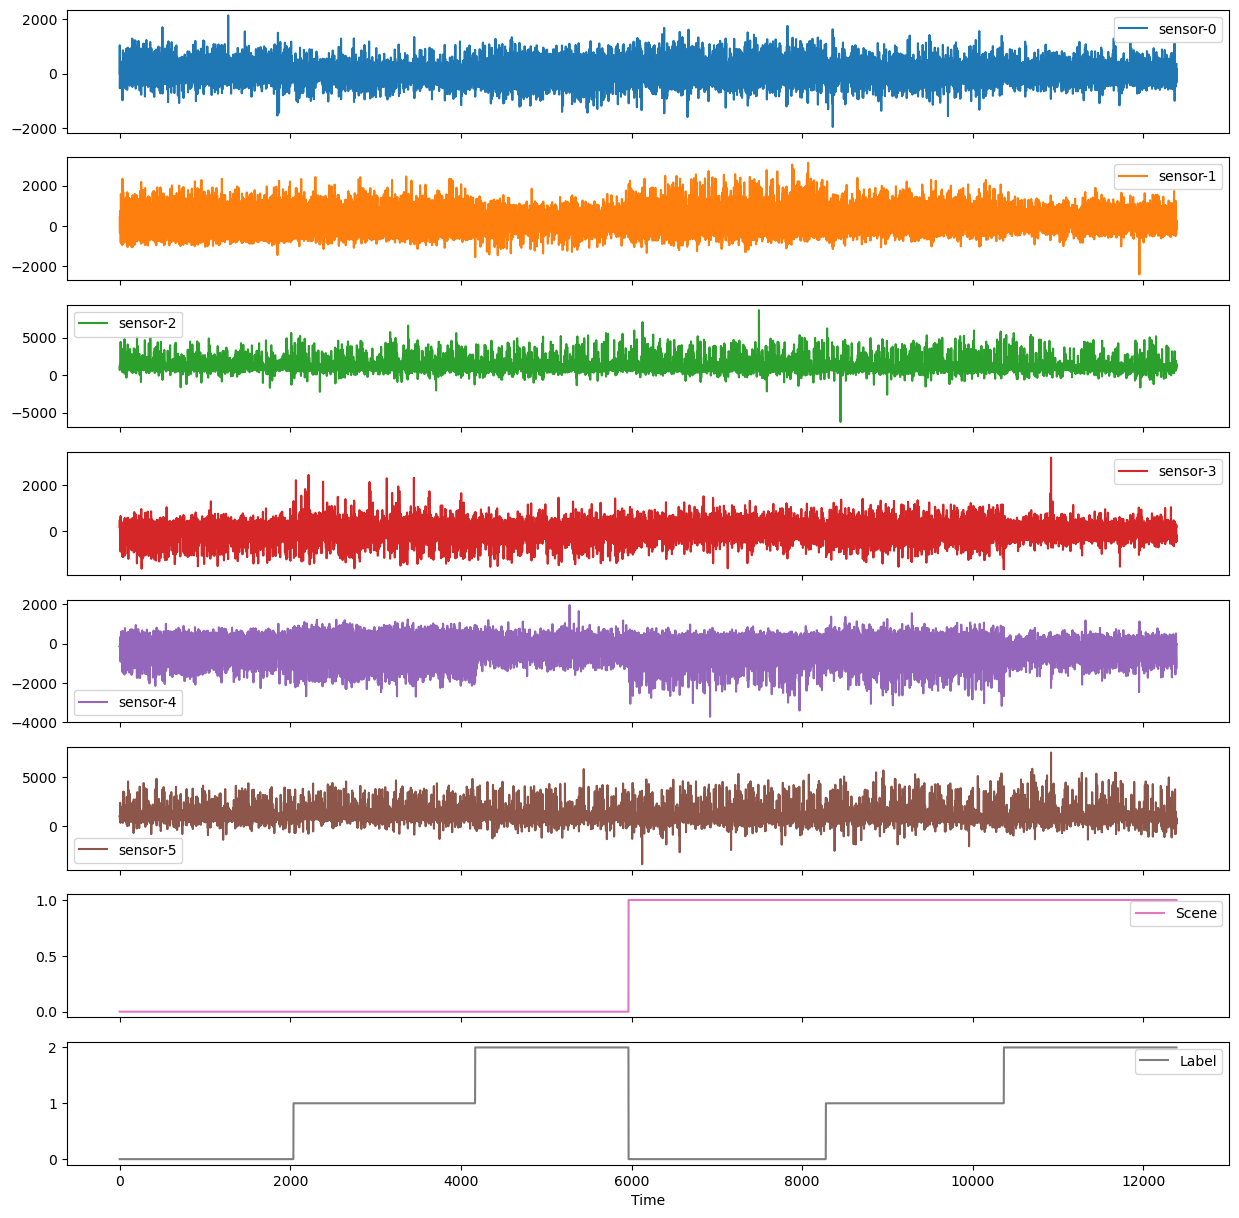

In [7]:
def prinUserSensorMatrix(S,L,Y):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    
    for t in range(0,X.shape[0]):
        ts.append(t)
    df['Time']=ts
    #print(ts)
    for s in range(0,X.shape[2]):
        ls.append("sensor-"+str(s))
        vs=S[:,:,s]
        vs=vs[:,0]
        print(vs.shape)
        df["sensor-"+str(s)]=vs
    

    
    ss=[]
    for t in range(0,X.shape[0]):
        ss.append(L[t])
    df['Scene']=ss
    ls.append('Scene')
    
    ys=[]
    for t in range(0,X.shape[0]):
        ys.append(Y[t])
    df['Label']=ys
    ls.append('Label')

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,15))    
    
prinUserSensorMatrix(X,S,Y)

In [8]:
print(X)       
print(X.shape)       

[[[ 5.67543800e+00  4.42555387e+02  1.14263000e+03  1.70862183e+02
   -1.54019214e+02  1.03496000e+03]
  [-4.00948636e+01  3.31175444e+02  1.00538000e+03  6.40651695e+01
   -1.04031659e+02  9.81610000e+02]
  [-5.20828961e+01  2.42556767e+02  9.84525000e+02 -1.42489500e+03
   -2.13636162e+01  1.38609000e+03]
  ...
  [-4.22600857e+01 -5.52434312e+01  1.03254000e+03 -5.80906209e+01
    3.48254439e+01  9.93255000e+02]
  [-4.16488219e+01 -5.61251101e+01  1.03060000e+03 -5.76320307e+01
    3.48199563e+01  9.90340000e+02]
  [-4.13166607e+01 -5.72932551e+01  1.03302500e+03 -5.71149700e+01
    3.46454173e+01  9.94710000e+02]]

 [[ 1.04856961e+03  1.09260520e+02  6.66130000e+02  4.69641184e+02
   -1.68218733e+02  1.12420000e+03]
  [ 1.39916879e+03  1.87632480e+02  1.98942000e+03  2.88191802e+02
   -1.79366888e+02  9.54450000e+02]
  [ 1.58496891e+03  1.40691232e+02  2.00712000e+03  2.78323277e+02
   -1.78022748e+02  9.81370000e+02]
  ...
  [-4.24672280e+01 -5.82373987e+01  1.03132500e+03 -5.86230

In [9]:
Y=to_categorical(Y)

In [10]:
print("nan:",np.argwhere(np.isnan(X)))
print(X[np.argwhere(np.isnan(X))])

nan: []
[]


In [11]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



classes=["der","izq","sim"]

Y_pred_total=np.array([])
Y_val_total=np.array([])


for sceneid in np.unique(S):

    print("SCENE:",sceneid)
    index_test=np.where(S == sceneid)[0]
    index_train=np.where(S != sceneid)[0]

    print("index_test",index_test)
    print("index_train",index_train)

    x_train=X[index_train]
    x_val=X[index_test]
    y_train=Y[index_train]
    y_val=Y[index_test]

    #normalizamos valores (18 valores=6 señales imu x 3 sensores)
    for ixv in range(0,X.shape[2]):
        print(x_train[:,:,ixv])
        avg_v=np.nanmean(x_train[:,:,ixv].flatten())
        std_v=np.nanstd(x_train[:,:,ixv].flatten())
        print("avg_v,std_v:",avg_v,std_v)
        x_train[:,:,ixv]=(x_train[:,:,ixv]-avg_v)/(std_v)
        x_val[:,:,ixv]=(x_val[:,:,ixv]-avg_v)/(std_v)

    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Dense(1024))
    model.add(Dense(len(classes), activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                epochs=25)


    y_pred = model.predict(x_val).argmax(axis=1)
    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))

    

    

SCENE: 0
index_test [   0    1    2 ... 5962 5963 5964]
index_train [ 5965  5966  5967 ... 12387 12388 12389]
[[   70.69718595  -857.97640778  -859.59500837 ...   -34.12329668
    -35.73860939   -35.49684821]
 [    7.98928503   299.14797752   190.44295921 ...   -35.41391299
    -35.31674569   -35.80813195]
 [-1093.63418337  -406.61223787  -229.59862761 ...   -23.90604648
    -35.33823756   -34.42051726]
 ...
 [ -162.27907123   -95.1037484    347.47149888 ...   536.65838707
    858.62622979   564.41288212]
 [ -329.2949668    -77.0383518   -172.21552913 ...  -391.44517537
   -143.38617347   254.33558308]
 [  361.80003975   109.62189864  -342.31584942 ...  -486.02459069
   -208.97916483  -481.1462331 ]]
avg_v,std_v: 45.860622514260236 386.24696792036934
[[-5.62039512e+02 -1.74613440e+02 -6.99038021e+02 ... -1.61781642e+01
  -1.42356128e+01 -1.03598494e+01]
 [ 1.49304379e+03  9.81977426e+02 -5.54772743e+01 ... -9.04667149e+00
  -9.04667149e+00 -1.17103922e+01]
 [ 2.08554462e+03  1.55889740

Epoch 18/25
101/101 [==============================] - 41s 408ms/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 0.3406 - val_accuracy: 0.9168
Epoch 19/25
101/101 [==============================] - 41s 403ms/step - loss: 0.0163 - accuracy: 0.9966 - val_loss: 0.2559 - val_accuracy: 0.9304
Epoch 20/25
101/101 [==============================] - 41s 406ms/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.2193 - val_accuracy: 0.9529
Epoch 21/25
101/101 [==============================] - 41s 409ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.3435 - val_accuracy: 0.9331
Epoch 22/25
101/101 [==============================] - 41s 408ms/step - loss: 0.0193 - accuracy: 0.9958 - val_loss: 0.2531 - val_accuracy: 0.9351
Epoch 23/25
101/101 [==============================] - 41s 409ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.4233 - val_accuracy: 0.9076
Epoch 24/25
101/101 [==============================] - 41s 411ms/step - loss: 0.0165 - accuracy: 0.9960 - val_loss: 0.2241 -

Epoch 10/25
94/94 [==============================] - 57s 605ms/step - loss: 0.0454 - accuracy: 0.9869 - val_loss: 0.2044 - val_accuracy: 0.9348
Epoch 11/25
94/94 [==============================] - 57s 606ms/step - loss: 0.0601 - accuracy: 0.9851 - val_loss: 0.2081 - val_accuracy: 0.9343
Epoch 12/25
94/94 [==============================] - 58s 614ms/step - loss: 0.0297 - accuracy: 0.9925 - val_loss: 0.4493 - val_accuracy: 0.8826
Epoch 13/25
94/94 [==============================] - 58s 618ms/step - loss: 0.0270 - accuracy: 0.9935 - val_loss: 0.3633 - val_accuracy: 0.8864
Epoch 14/25
94/94 [==============================] - 48s 514ms/step - loss: 0.0336 - accuracy: 0.9913 - val_loss: 0.8596 - val_accuracy: 0.8381
Epoch 15/25
94/94 [==============================] - 55s 582ms/step - loss: 0.0254 - accuracy: 0.9946 - val_loss: 0.5916 - val_accuracy: 0.8711
Epoch 16/25
94/94 [==============================] - 56s 598ms/step - loss: 0.0297 - accuracy: 0.9931 - val_loss: 0.3450 - val_accuracy:

[2. 2. 2. ... 1. 1. 1.]
[0. 0. 0. ... 2. 2. 2.]
[[4052  192  106]
 [ 208 3897  112]
 [  69  558 3196]]
Classification Report TOTAL
              precision    recall  f1-score   support

         der       0.94      0.93      0.93      4350
         izq       0.84      0.92      0.88      4217
         sim       0.94      0.84      0.88      3823

    accuracy                           0.90     12390
   macro avg       0.90      0.90      0.90     12390
weighted avg       0.90      0.90      0.90     12390



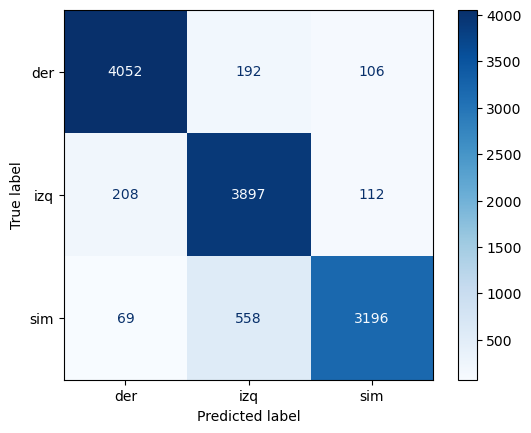

In [12]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()

# 